## Predicting Developer Salaries

### Project Background
Africa’s Tech sector has become one of the fastest growing tech ecosystems in the world with tech being one of the fastest growing sectors in Africa. This has led to a rise in demand for jobs in the industry.
However, unlike other parts of the world, information on remuneration in these jobs remains hard to come by. Existing resources such as glassdoor and brighter monday have limited information on salaries in Africa.
Over the past few years, it has been observed that foreign companies enter the African Market, offering more competitive salaries compared to local companies resulting in mass movement of experienced developers into these new roles.
This project seeks to solve this problem by developing a platform that can predict developer salaries based on their personal information, and also, providing comparison between different incomes in different regions for similar roles.


### Stakeholders:
- Jobseekers
- Employers
- Recruitment agencies

### Business Understanding
Salary negotiation can be a critical stage in the job search process, and job seekers often encounter various challenges during this phase like lack of information on salary trends. This means that a jobseeker might spend valuable time researching industry salary trends. Some might not be so lucky as the information might be non existent.

As the Tech labour market becomes more competitive, offering the right salary for new and current employees is crucial for employers as it means keeping or losing a valued resource. Thus it is imperative for them to offer fair and competitive compensation that is benchmarked to their industry

Our project looks at coming up with salary prediction model to help both jobseekers and employers with the above challenges. We will focus on the tech industry (developers) and use data from stackoverflow's annual developer survey.

### Problem statement
Our solution to the problem of inadequate salary data for both employees and employers is to develop a salary prediction model, to estimate salaries based on relevant job specifications. The model will assist in making informed decisions related to compensation and provide valuable insights for both job seekers and employers.

The salary prediction model will enable job seekers to have a better understanding of the salary expectations associated with their qualifications and experience.

Employers can use the model to make informed decisions regarding fair compensation packages for new hires or salary adjustments for existing employees.

Job sites like linkedin, glassdoor, brigther monday can use this model for jobs displayed on the sites by quoting the estimated salaries


### Objectives

- The main objective of this project is to come up with a salary rediction model that will:
- Enable Jobseekers to ask for competitive salaries during contract negotiations.
- Assist employers in offering fair compensation to their employees.
- Assist Recruitment agencies offer accurate salary estimates to their clients.

These objectives will be achieved through the following specific objectives:
- To select the most important features in the dataset to be used in Salary prediction.
- To describe how features such as Proffessional experience and Education level affect Annual compensation.
- To build multiple regression models and identify the most suitable model to be used in the prediction.
- To deploy the model using streamlit as an online dashboard.

### Success Metrics

The metrics to be used to measure the success of the model are:
- Mean Absolute Error
- Root Mean Square Error
- Rsquared

An Rsquared  value of 75% or more will be considered a success, i.e the model explains more than 75% of the  variance in pay of the developers.

### Data Understanding
The data comes from [stakoverflow annual developer survey](https://insights.stackoverflow.com/survey/) for 2022. Each row shows the responses given by a developer. It has 73268 rows and  79 columns. The data has missing values, but no duplicate rows.

The target variable ConvertedCompYearly shows the annual salary for each developer.
The data contains responses from 180 countries.
Opportunities to clean the data and use PCA to reduce the number of columns



In [3]:
!pip install ydata_profiling
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 53.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b85a5ee201ecf46c27dc66d23f1bc23940f16652bf379cc2171e081af500d069
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordcloud-1.8.2.2:
      Successfully uninstalled wordcloud-1.8.2.2
     ━━━━━━━━━━━━━

In [4]:
# import all required modules
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('dark')
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import statsmodels.api as sm

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [9]:
#load dataset
df = pd.read_csv(r'survey_results_public.csv')
df.head(2)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN


#### Class for Understanding Dataset
Below we create a class to:
- give data dimensions
- display column info
- give descriptive stats on numerical columns
- check data types, duplicates & missing values

From the below outputs of the class:
- The Dataset has no duplicates
- Data has 6 numeric columns and 73 categorical columns
- 77 columns have missing values, ranging from 2% (`country` column) to 100% (`VCHostingProfessional use` & `VCHostingPersonal use` columns). We will deal with missing values in the data cleaning section

In [10]:
# class to describe dataset

class Describer:

    # initialize object
    def __init__(self, df):
        self.df = df

    # method to check shape of data
    def shape(self):
        out = print(f"The DataFrame has:\n\t* {self.df.shape[0]} rows\n\t* {self.df.shape[1]} columns", '\n')
        return out

    # method to check info on dataset
    def data_info(self):
        out = print(self.df.info(), '\n')
        return out

    # method to describe numerical columns
    def data_describe(self):
        out = self.df.describe()
        return out

    # method to check data types
    def data_type(self):
        """A simple function to check the data types on th datasets """

        print("Data has",len( df.select_dtypes(include='number').columns),
                "Numeric columns")

        print("and", len(df.select_dtypes(include='object').columns),
          "Categorical columns")

        print('*******************')
        print('*******************')

        print('Numerical Columns:', df.select_dtypes(include='number').columns)
        print('Categorical Coulumns:', df.select_dtypes(include='object').columns)

        return None

    # check duplicates

    def check_duplicates(self):
        duplicates = []

        """Function that iterates through the rows of our dataset to check whether they are duplicated or not"""

        for i in df.duplicated():
            duplicates.append(i)
        duplicates_set = set(duplicates)
        if(len(duplicates_set) == 1):
            print('The Dataset has No Duplicates')

        else:
            duplicates_percentage = np.round(((sum(duplicates)/len(df)) * 100 ), 2)
            print(f'Duplicated rows constitute of {duplicates_percentage} % of our dataset')

        return None

    # method to check missing values
    def missing_values(self):

        """ Function for checking null values in percentage in relation to length of the dataset """

        if df.isnull().any().any() == False :

            print("There Are No Missing Values")

        else:

            missing_values = df.isnull().sum().sort_values(ascending=False)

            missing_val_percent = ((df.isnull().sum()/len(df)).sort_values(ascending=False))

            missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage %': missing_val_percent})

            return missing_df[missing_df['Percentage %'] > 0]

# creating an instance of the class describer
describe_df = Describer(df)

# lets view the shape of the data
describe_df.shape()

# lets check for duplicates
describe_df.check_duplicates()

# lets describe data types
describe_df.data_type()

# lets view the info of the data
describe_df.data_info()

# lets describe numerical cols
describe_df.data_describe()

# lets get missing values
describe_df.missing_values()




The DataFrame has:
	* 3605 rows
	* 79 columns 

The Dataset has No Duplicates
Data has 6 Numeric columns
and 73 Categorical columns
*******************
*******************
Numerical Columns: Index(['ResponseId', 'CompTotal', 'VCHostingPersonal use',
       'VCHostingProfessional use', 'WorkExp', 'ConvertedCompYearly'],
      dtype='object')
Categorical Coulumns: Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', '

,Missing Values,Percentage %
VCHostingProfessional use,3605,1.000000
VCHostingPersonal use,3605,1.000000
LearnCodeCoursesCert,2703,0.749792
OfficeStackAsyncWantToWorkWith,2251,0.624411
Frequency_3,2005,0.556172
...,...,...
Employment,42,0.011650
VersionControlSystem,41,0.011373
LearnCode,40,0.011096
SOAccount,39,0.010818


### Data Cleaning
The data cleaning process will entail the following:
- Renaming clumsily worded columns for easier understanding
- Dealing with missing data from the 77 columns
    - Drop columns with 100% missing data

#### Renaming Columns
When going through the data, we noticed some clumsily worded columns. To make the data easier to understand, we came up with new names. Below we code a function that will take in the new and old names as key-value pairs, then use these to rename the columns in the dataframe.

We have run the function below and confirmed renaming of a few columns e.g. columns 3 to 5

In [11]:

def rename(data):

    # import text doc with old and new col names
    cols = pd.read_csv(r'cols.txt', sep='\t')

    # create a dictionary with the cols df
    cols_dict = dict(zip(cols['Old'], cols['New']))

    # rename cols in the dataframe
    df = data.rename(columns = cols_dict)

    return df

df = rename(df)
df.head()

,ResponseId,Developer_Description,Employment_Status,Remote_vs_Onsite,Outofwork_Coding,Education_Level,Learn_Code_Method,Learn_Code_Source,Code_Certifications,Coding_Experience,...,TimeSearching_Answers,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


### Cleaning Missing Data
`VCHostingProfessional use` and `VCHostingPersonal use` columns have no data, hence have 100% missing values. We drop these 2 columns for this reason

In [12]:
describe_df.missing_values()

,Missing Values,Percentage %
VCHostingProfessional use,3605,1.000000
VCHostingPersonal use,3605,1.000000
Code_Certifications,2703,0.749792
Proj_Mgmt_WantToWorkWith,2251,0.624411
Knowledge_Silos,2005,0.556172
...,...,...
Employment_Status,42,0.011650
VersionControlSystem,41,0.011373
Learn_Code_Method,40,0.011096
SOAccount_Ownership,39,0.010818


In [13]:
# function to drop 'VCHostingProfessional use' &  'VCHostingPersonal use' cols
def dropping_columns(data, columns):

    """A simple function to drop columns with missing values"""

    drop_column = data.drop(columns=columns, axis=1)

    return drop_column

columns_to_drop = ['VCHostingProfessional use', 'VCHostingPersonal use']

df = dropping_columns(df, columns_to_drop)

describe_df.missing_values()


,Missing Values,Percentage %
Code_Certifications,2703,0.749792
Proj_Mgmt_WantToWorkWith,2251,0.624411
Knowledge_Silos,2005,0.556172
ProfessionalTech,1997,0.553953
Workflow_Interruptions,1985,0.550624
...,...,...
Employment_Status,42,0.011650
VersionControlSystem,41,0.011373
Learn_Code_Method,40,0.011096
SOAccount_Ownership,39,0.010818


### Columns With Legitimately Missing Values
The column `Participation_PDS` allowed a developer to choose wether or not they would answer the subsequent 20 questions. This means that the missing values for these will be missing because they should.

In `Participation_PDS` we will replace NA with No, then in the subsequent PDS questions, replace NA with Not Answered

In [14]:
# function to replace NA in Participation_PDS with No
def fill_pds(data):
    data['Participation_PDS'] = data.Participation_PDS.fillna('No')
    return data

df = fill_pds(df)
df.Participation_PDS.unique()

array(['No', 'Yes'], dtype=object)

In [15]:
# function to clean cols 'Contributor_or_Manager':'Learning_Support'
def replace_na(data):
    for index, row in data.iterrows():
        if row['Participation_PDS'] == 'No':
            data.loc[index, 'Contributor_or_Manager':'Learning_Support'] = 'Not Answered'
    return data

df = replace_na(df)
df.head()

,ResponseId,Developer_Description,Employment_Status,Remote_vs_Onsite,Outofwork_Coding,Education_Level,Learn_Code_Method,Learn_Code_Source,Code_Certifications,Coding_Experience,...,TimeSearching_Answers,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Too long,Easy,NaN


In [16]:
describe_df.missing_values()

,Missing Values,Percentage %
Code_Certifications,2703,0.749792
Proj_Mgmt_WantToWorkWith,2251,0.624411
MiscTechWantToWorkWith,1917,0.531761
PlatformWantToWorkWith,1731,0.480166
WebframeWantToWorkWith,1619,0.449098
...,...,...
TimeSearching_Answers,35,0.009709
Is_Involved_Onboarding,34,0.009431
Country,33,0.009154
Extroverted,23,0.006380


After cleaning the legitimate missing columns above, we expected subsequent values to contain no missing data. However, on inspecting some 'Yes' values in  `Participation_PDS` we realised they also had some missing values in the subsequent columns. Below we clean these missing values by assigning them to 'Not Answered'

In [17]:
# function to replace yes in Participation_PDS with missing vals in subsequent columns
    # Define the range of columns
columns_range = ['Contributor_or_Manager', 'WorkExp', 'Extroverted', 'Siloed_Teams',
       'Information_Availability', 'Well_Resourced', 'Info_Answ_Resource',
       'Recurring_Responses', 'Workflow_Interruptions',
       'External_Team_Assistance', 'External_Team_Interaction',
       'Knowledge_Silos', 'TimeSearching_Answers', 'TimeAnswering',
       'Onboarding_Duration', 'ProfessionalTech', 'Is_Involved_Onboarding',
       'Employer_Learning_Resources', 'Learning_Support']

def replace_yesna(data, columns_range, valuefill):
    # Replace 'NA' with 'not answered' in the specified range of columns
    data[columns_range] = data[columns_range].fillna(valuefill)
    return data

df = replace_yesna(df, columns_range,'Not Answered')

df.TimeSearching_Answers.value_counts()


Not Answered                  1972
30-60 minutes a day            673
15-30 minutes a day            418
60-120 minutes a day           286
Less than 15 minutes a day     136
Over 120 minutes a day         120
Name: TimeSearching_Answers, dtype: int64

After cleaning these columns, we now have 55 columns with missing values

In [18]:
len(describe_df.missing_values())

55

To replace the missing values of `SurveyLength` and `SurveyEase`, we reviewed the most common values in both columns. In the former, 'Appropriate in length' is 76% while in the latter, 'Easy' is 67%. Below we use these 2 values to fill missing values for the 2 columns

In [19]:
# for
print(df.SurveyLength.value_counts(normalize=True))
print(df.SurveyEase.value_counts(normalize=True))

Appropriate in length    0.834379
Too long                 0.115735
Too short                0.049886
Name: SurveyLength, dtype: float64
Easy                          0.738884
Neither easy nor difficult    0.254319
Difficult                     0.006797
Name: SurveyEase, dtype: float64


In [20]:
def len_eas(data):
    data.SurveyLength.fillna('Appropriate in length', inplace=True)
    data.SurveyEase.fillna('Easy', inplace=True)

    return data

df = len_eas(df)

print(df.SurveyLength.isna().sum())
print(df.SurveyEase.isna().sum())

0
0


The `Annual_Salary` column is our target variable. It has 47% of its values missing. **to be continued**

In [21]:
print(df['Annual_Salary'].isna().sum())
print(df['Total_Salary'].isna().sum())

1504
1491


In [22]:
print(len(describe_df.missing_values()))
describe_df.missing_values()

53


,Missing Values,Percentage %
Code_Certifications,2703,0.749792
Proj_Mgmt_WantToWorkWith,2251,0.624411
MiscTechWantToWorkWith,1917,0.531761
PlatformWantToWorkWith,1731,0.480166
WebframeWantToWorkWith,1619,0.449098
Annual_Salary,1504,0.417198
Total_Salary,1491,0.413592
Proj_Mgmt_SyncWantToWorkWith,1370,0.380028
Proj_Mgmt_HVWorkedWith,1343,0.372538
MiscTechHaveWorkedWith,1340,0.371706


Below we select rows with 20% - 70% missing values in all columns. Looking at the sample distribution of missing values, we will drop all rows with more than 50% missing values as they quality of their responses are doubful

In [23]:
# function to calculate 20% - 70% of col missing values
def missing_vals(data):
    # Calculate the percentage of missing values for each row
    missing_percentages = data.isnull().mean(axis=1) * 100

    # Select rows with 20% missing values
    rows_20_percent_missing = data[missing_percentages >= 20]

    # Select rows with 50% missing values
    rows_50_percent_missing = data[missing_percentages >= 50]

    # Select rows with 60% missing values
    rows_60_percent_missing = data[missing_percentages >= 60]

    # Select rows with 70% missing values
    rows_70_percent_missing = data[missing_percentages >= 70]

    out = print("20% missing: ", len(rows_20_percent_missing), "50% missing: ", len(rows_50_percent_missing),
                "60% missing: ", len(rows_60_percent_missing), "70% missing: ", len(rows_70_percent_missing))
    return out

missing_vals(df)

20% missing:  700 50% missing:  36 60% missing:  34 70% missing:  0


In [24]:
# function to drop rows with more than 50% missing values
def drop_50(data):
    threshold = len(data.columns) * 0.5  # 50% of total columns
    data = data.dropna(thresh=threshold)

    return data

df = drop_50(df)
df.shape

(3569, 77)

In [25]:
cols = """Code_Certifications
Proj_Mgmt_WantToWorkWith
MiscTechWantToWorkWith
Annual_Salary
Total_Salary
PlatformWantToWorkWith
Salary_Frequency
MiscTechHaveWorkedWith
WebframeWantToWorkWith
Proj_Mgmt_HVWorkedWith
ToolsTechWantToWorkWith
Proj_Mgmt_SyncWantToWorkWith
PlatformHaveWorkedWith
Learn_Code_Source
PurchaseInfluence
DatabaseWantToWorkWith
OrgSize
Currency
Pro_Experience
WebframeHaveWorkedWith
ToolsTechHaveWorkedWith
SOA_ParticipationFreq
Outofwork_Coding
Remote_vs_Onsite
DatabaseHaveWorkedWith
DevType
Proj_Mgmt_SyncHaveWorkedWith
NEWCollabToolsWantToWorkWith
OpSysProfessional use
MentalHealth
Sexuality
LanguageWantToWorkWith
Disability
Purchase_Research
VCInteraction
Ethnicity
Trans
NEWCollabToolsHaveWorkedWith
Gender
Age
OpSysPersonal use
SOVisitFreq
LanguageHaveWorkedWith
Blockchain_Sentiment
Coding_Experience
New_Stack_Overfl_Sites
VersionControlSystem
Belong_SO_Comm
Education_Level
SOAccount_Ownership
Learn_Code_Method
Employment_Status
"""
# function to split cols variable into a list
def listcols(cols):
    cols_list = cols.split('\n')
    cols_list = [col.strip() for col in cols_list if col.strip()]

    return cols_list

cols_list = listcols(cols)
print(cols_list)

['Code_Certifications', 'Proj_Mgmt_WantToWorkWith', 'MiscTechWantToWorkWith', 'Annual_Salary', 'Total_Salary', 'PlatformWantToWorkWith', 'Salary_Frequency', 'MiscTechHaveWorkedWith', 'WebframeWantToWorkWith', 'Proj_Mgmt_HVWorkedWith', 'ToolsTechWantToWorkWith', 'Proj_Mgmt_SyncWantToWorkWith', 'PlatformHaveWorkedWith', 'Learn_Code_Source', 'PurchaseInfluence', 'DatabaseWantToWorkWith', 'OrgSize', 'Currency', 'Pro_Experience', 'WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'SOA_ParticipationFreq', 'Outofwork_Coding', 'Remote_vs_Onsite', 'DatabaseHaveWorkedWith', 'DevType', 'Proj_Mgmt_SyncHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use', 'MentalHealth', 'Sexuality', 'LanguageWantToWorkWith', 'Disability', 'Purchase_Research', 'VCInteraction', 'Ethnicity', 'Trans', 'NEWCollabToolsHaveWorkedWith', 'Gender', 'Age', 'OpSysPersonal use', 'SOVisitFreq', 'LanguageHaveWorkedWith', 'Blockchain_Sentiment', 'Coding_Experience', 'New_Stack_Overfl_Sites', 'VersionControlS

We select the columns with missing values, then below we run a profiles report to inspect the properties of each columns, and decide on how to deal with the missing values.

In [26]:
# function to display profile report for cols
# with missing values
def profile_report(data, cols_list):
    missing_cols = data[cols_list]
    profile = ProfileReport(missing_cols, title = "Profiling Report", minimal = True)
    return profile

#profile_report(df, cols_list)

#### Drop `Total_Salary`, `Salary_Frequency` and `Currency` Columns
These columns are used to compute `Annual_Salary` column, which is our target variable. Thus they should not form part of the feature variables

In [27]:
# use our function to drop
columns_to_drop1 = ['Total_Salary', 'Salary_Frequency', 'Currency']
df = dropping_columns(df, columns_to_drop1)
df.shape[1]

74

In [28]:
# confirming cols have been dropped
def confirm(data, columns_to_drop1):
    for i in columns_to_drop1:
        print(i in data.columns)
    return None

confirm(df, columns_to_drop1)

False
False
False


#### Handle Missing Values with None of the Above
The columns below have valid missing values because the response options did not allow the developers specify the responses that did not apply to them. For example in the column `Code_Certifications` asks developers the online resources they used to learn coding. However, it is possible that some people didn't use these resources because they learned coding in the degree courses for example. Since this option misses from the responses, those develpers opted to skip for this reason. The same logic applies to the remaining columns selected below

In [29]:
# create list of columns
cols1 = """Code_Certifications
Proj_Mgmt_WantToWorkWith
MiscTechWantToWorkWith
PlatformWantToWorkWith
MiscTechHaveWorkedWith
WebframeWantToWorkWith
Proj_Mgmt_HVWorkedWith
ToolsTechWantToWorkWith
Proj_Mgmt_SyncWantToWorkWith
PlatformHaveWorkedWith
Learn_Code_Source
PurchaseInfluence
DatabaseWantToWorkWith
WebframeHaveWorkedWith
ToolsTechHaveWorkedWith
Outofwork_Coding
DevType
Proj_Mgmt_SyncHaveWorkedWith
NEWCollabToolsWantToWorkWith
MentalHealth
LanguageWantToWorkWith
Disability
Purchase_Research
VCInteraction
NEWCollabToolsHaveWorkedWith
New_Stack_Overfl_Sites
OrgSize
Remote_vs_Onsite
DatabaseHaveWorkedWith"""

cols_list1 = listcols(cols1)
print(cols_list1)

['Code_Certifications', 'Proj_Mgmt_WantToWorkWith', 'MiscTechWantToWorkWith', 'PlatformWantToWorkWith', 'MiscTechHaveWorkedWith', 'WebframeWantToWorkWith', 'Proj_Mgmt_HVWorkedWith', 'ToolsTechWantToWorkWith', 'Proj_Mgmt_SyncWantToWorkWith', 'PlatformHaveWorkedWith', 'Learn_Code_Source', 'PurchaseInfluence', 'DatabaseWantToWorkWith', 'WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'Outofwork_Coding', 'DevType', 'Proj_Mgmt_SyncHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'MentalHealth', 'LanguageWantToWorkWith', 'Disability', 'Purchase_Research', 'VCInteraction', 'NEWCollabToolsHaveWorkedWith', 'New_Stack_Overfl_Sites', 'OrgSize', 'Remote_vs_Onsite', 'DatabaseHaveWorkedWith']


In [30]:
# use function to filll in list of columns with None
df = replace_yesna(df, cols_list1,'None of the Above')
df.Code_Certifications.value_counts()

None of the Above                              2667
Udemy                                           141
Other                                            92
Udemy;Pluralsight                                55
Udemy;Codecademy                                 55
                                               ... 
Coursera;Udemy;Pluralsight;Other                  1
Udemy;Codecademy;Pluralsight;Skillsoft            1
Coursera;Codecademy;edX;Other                     1
Codecademy;Skillsoft                              1
Coursera;Udemy;Codecademy;Pluralsight;Other       1
Name: Code_Certifications, Length: 92, dtype: int64

#### Missing Values filled With One of the Response Options
For this set of columns, we have identified a criteria to fill in the missing values based on the response distribution. For example:
- demographic variable missing values are filled with preferred not to say option due to sensitivity
- some other variables filled with the most common response option based on domain knowledge e.g operating systems used
- while some filled with 'not sure/can't rememember'- e.g. blockchain sentiments

In [31]:
# Function to rename values in the 'Experience' column
def rename_values(df, column):
    df[column] = df[column].replace({'Less than 1 year': 0.5, 'More than 50 years': 50})
    return df

# Call the function to rename values in the 'Pro_Experience' column
df = rename_values(df, 'Pro_Experience')

# Call the function to rename values in the 'Coding_Experience' column
df = rename_values(df, 'Coding_Experience')


In [32]:
# cols to fill with 'Prefer not to say'
demo = ['Sexuality', 'Ethnicity', 'Trans', 'Gender', 'Employment_Status']

df = replace_yesna(df, demo,'Prefer not to say')

# fill Age with '25-34 years old'
df = replace_yesna(df, 'Age','25-34 years old')

# fill 'OpSysPersonal use' & 'OpSysProfessional use' with 'Windows'
ops = ['OpSysPersonal_use', 'OpSysProfessional_use']
df = replace_yesna(df, ops,'Windows')

# fill  SOVisitFreq with 'Daily or almost daily'
df = replace_yesna(df, 'SOVisitFreq','Daily or almost daily')

# fill Blockchain_Sentiment with 'Unsure'
df = replace_yesna(df, 'Blockchain_Sentiment','Unsure')

# fill Coding_Experience, Pro_Experience with median
df['Coding_Experience'].fillna(df['Coding_Experience'].median(), inplace=True)
df['Pro_Experience'].fillna(df['Pro_Experience'].median(), inplace=True)

# fill VersionControlSystem with 'I don't use one'
df = replace_yesna(df, 'VersionControlSystem',"I don't use one")

# fill Belong_SO_Comm with 'Not sure'
df = replace_yesna(df, 'Belong_SO_Comm',"Not sure")

# fill Education_Level with 'Something else'
df = replace_yesna(df, 'Education_Level',"Something else")

# fill SOAccount_Ownership with Not sure/can't remember
df = replace_yesna(df, 'SOAccount_Ownership',"Not sure/can't remember")

# fill Learn_Code_Method with 'I don't use one'
df = replace_yesna(df, 'Learn_Code_Method',"I don't use one")

# fill SOA_ParticipationFreq with 'Less than once per month or monthly'
df = replace_yesna(df, 'SOA_ParticipationFreq',"Less than once per month or monthly")

# fill LanguageHaveWorkedWith with 'Bash/Shell'
df = replace_yesna(df, 'LanguageHaveWorkedWith',"Bash/Shell")


In [33]:
print(len(describe_df.missing_values()))
describe_df.missing_values()

1


,Missing Values,Percentage %
Annual_Salary,1468,0.41132


#### Handling Multiple Response Values
From the profiles analysis, the columns below were discovered to contain multiple and fragmented respones for each row, which masked the true distribution across categories due to unique combination of values contained in each row. To untangle the values and have unique responses, we will select the first mentioned response. Our rationale is that this responses for e.g in `Code_Certifications` represents the online resource that was used most often, was most impactful, or most memorable to the developer. The same arguement holds for the other columns.

In [34]:
# Code to extract first mentions
def extract_first_value_from_columns(df, columns):
    first_values = {}
    for col in columns:
        first_values[col] = df[col].apply(lambda x: x.split(";")[0].strip() if isinstance(x, str) and ";" in x else x)
    return pd.DataFrame(first_values)

# columns to be cleaned
colslist = ['Code_Certifications', 'Proj_Mgmt_WantToWorkWith', 'MiscTechWantToWorkWith', 'PlatformWantToWorkWith',
'WebframeWantToWorkWith', 'Proj_Mgmt_HVWorkedWith', 'ToolsTechWantToWorkWith', 'Proj_Mgmt_SyncWantToWorkWith',
'PlatformHaveWorkedWith', 'Learn_Code_Source', 'DatabaseWantToWorkWith', 'WebframeHaveWorkedWith',
'ToolsTechHaveWorkedWith', 'Outofwork_Coding', 'DatabaseHaveWorkedWith', 'DevType',
'Proj_Mgmt_SyncHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSysProfessional_use', 'MentalHealth',
'Sexuality', 'LanguageWantToWorkWith', 'Disability', 'Purchase_Research', 'VCInteraction', 'Ethnicity',
'NEWCollabToolsHaveWorkedWith', 'OpSysPersonal_use', 'LanguageHaveWorkedWith', 'New_Stack_Overfl_Sites',
'VersionControlSystem', 'Learn_Code_Method', 'Employment_Status', 'Gender', 'ProfessionalTech']

# data with cols of first mentions
zer = extract_first_value_from_columns(df, colslist)
zer.Code_Certifications.value_counts(normalize=True)

None of the Above    0.747268
Udemy                0.101709
Coursera             0.082936
Other                0.025778
Codecademy           0.022976
Pluralsight          0.013449
edX                  0.003082
Udacity              0.002242
Skillsoft            0.000560
Name: Code_Certifications, dtype: float64

In [35]:
# replace the colslist in df with cleaned data
# from zer dataframe
df[colslist] = zer

# confirm that values display as expected
df.Code_Certifications.value_counts(normalize=True)

None of the Above    0.747268
Udemy                0.101709
Coursera             0.082936
Other                0.025778
Codecademy           0.022976
Pluralsight          0.013449
edX                  0.003082
Udacity              0.002242
Skillsoft            0.000560
Name: Code_Certifications, dtype: float64

#### Cleaning the `Annual_Salary` Column
To clean this column's missing values, we will look at:
- the employment of each respondent. For unemployed and students without salary values, we will replace missing values with 0 as it is unrealistic to impute values for this group
- the salary distribution at a regional level (e.g. salaries in Africa would differ from Europe), then use the appropriate median value


In [36]:
# for those who don't work and have no salary
# fill missing salary with 0
nonwork = ['Student, full-time', 'Student, part-time',
       'Not employed, but looking for work',
 'Not employed, and not looking for work',
       'Retired', 'I prefer not to say']

df.loc[(df['Employment_Status'].isin(nonwork)) & (df['Annual_Salary'].isna()), 'Annual_Salary'] = 0
# confirm that the replace has worked
print(df.Annual_Salary.value_counts().head(), '\n')

# confirm that other null values still exist
print('remaining missing values: ', df.Annual_Salary.isna().sum())

0.0         797
200000.0     33
120000.0     30
100000.0     30
150000.0     28
Name: Annual_Salary, dtype: int64 

remaining missing values:  671


In [37]:
# countries grouped into continents
continents = {
    'Asia': ['Israel', 'Hong Kong (S.A.R.)', 'India', 'China', 'Singapore', 'Iraq',
             'Philippines', 'Iran, Islamic Republic of...', 'Indonesia', 'Afghanistan',
             'Viet Nam', 'South Korea', 'Taiwan', 'Japan', 'Thailand', 'Bangladesh',
             'Nepal', 'United Arab Emirates', 'Pakistan', 'Sri Lanka', 'Azerbaijan',
             'Uzbekistan', 'Kazakhstan', 'North Korea', 'Timor-Leste', 'Brunei Darussalam',
             'Oman', 'Saudi Arabia', 'Maldives', 'Jordan', 'Bahrain', 'Republic of Korea',
            'Lebanon', 'Malaysia', "Lao People's Democratic Republic", 'Syrian Arab Republic',
            'Qatar', 'Kyrgyzstan', 'Cambodia', 'Yemen', 'Mongolia', 'Tajikistan', 'Myanmar',
            'Kuwait', 'Turkmenistan', 'Palestine', 'Bhutan'],
    'Oceania': ['Australia', 'New Zealand', 'Fiji', 'Solomon Islands', 'Papua New Guinea',
                'Palau'],
    'North America': ['Canada', 'United States of America', 'Mexico', 'Dominican Republic',
                     'Costa Rica', 'Nicaragua', 'Belize', 'Guatemala', 'El Salvador',
                     'Jamaica', 'Cuba', 'Panama', 'Bahamas', 'Barbados', 'Antigua and Barbuda',
                      'Haiti', 'Saint Lucia', 'Saint Kitts and Nevis'],
    'Europe': ['Croatia', 'Netherlands', 'Czech Republic', 'Sweden', 'Denmark',
               'Finland', 'United Kingdom of Great Britain and Northern Ireland',
               'Austria', 'France', 'Portugal', 'Belgium', 'Ireland', 'Iceland',
               'Montenegro', 'Germany', 'Belarus', 'Switzerland', 'Poland',
               'Ukraine', 'Russia', 'Serbia', 'Luxembourg', 'Spain', 'Norway',
               'Romania', 'Italy', 'Turkey', 'Greece', 'Hungary', 'Malta',
               'Estonia', 'Slovenia', 'Bosnia and Herzegovina', 'Bulgaria',
               'Georgia', 'Latvia', 'Lithuania', 'Moldova', 'Macedonia (FYROM)', 'Armenia',
               'Monaco', 'Slovakia', 'Cyprus', 'Russian Federation',
              'The former Yugoslav Republic of Macedonia', 'Andorra', 'Nomadic', 'Albania',
              'Republic of Moldova', 'Kosovo', 'Isle of Man', 'San Marino'],
    'Africa': ['Madagascar', 'South Africa', 'Swaziland', 'Mali', 'Egypt', 'Nigeria',
               'Tunisia', 'Cameroon', 'Ethiopia', 'Ghana', 'Rwanda', 'Senegal',
               'Chad', 'Benin', 'Angola', 'Namibia', 'Malawi', 'Sierra Leone',
               'Zimbabwe', 'Mauritius', 'Morocco', 'Kenya', 'Botswana', 'Liberia', 'Lesotho',
               'Guinea', 'Gabon', 'Seychelles', 'Algeria', 'Zambia', 'Uganda',
              'United Republic of Tanzania', 'Niger', 'Cape Verde', 'Libyan Arab Jamahiriya',
              'Togo', 'Sudan', 'Democratic Republic of the Congo', "Côte d'Ivoire",
              'Congo, Republic of the...', 'Somalia', 'Mozambique', 'Mauritania',
              'Burkina Faso', 'Gambia', 'Djibouti'],
    'South America': ['Brazil', 'Argentina', 'Colombia', 'Chile', 'Peru',
                      'Venezuela, Bolivarian Republic of...', 'Bolivia', 'Paraguay',
                      'Ecuador', 'Uruguay', 'Honduras', 'Trinidad and Tobago', 'Suriname',
                     'Guyana']
}

In [38]:
# Create the 'continents' column by mapping the 'countries' column to the continents dictionary
df['continents'] = df['Country'].map({country: continent for continent, countries in continents.items()
                                        for country in countries})

In [39]:
# get median salary for each continent
salo = df[df.Annual_Salary > 0].groupby('continents')['Annual_Salary'].median()
salo

continents
Africa            37932.0
Asia              40116.0
Europe            66119.0
North America    135000.0
Oceania           81387.0
South America     32412.0
Name: Annual_Salary, dtype: float64

In [40]:
continent_mapping = {
    'Africa': 18126.0,
    'Asia': 23215.0,
    'Europe': 59720.0,
    'North America': 132000.0,
    'Oceania': 92002.0,
    'South America': 27008.5}

df['Annual_Salary'] = df.groupby('continents')['Annual_Salary'].apply(lambda x: x.fillna(continent_mapping[x.name]))

df.Annual_Salary.isna().sum()

<ipython-input-40-07040be0ebc2>:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['Annual_Salary'] = df.groupby('continents')['Annual_Salary'].apply(lambda x: x.fillna(continent_mapping[x.name]))


0

In [41]:
# preview salary columnn after handling missing values
df[['continents', 'Country', 'Annual_Salary']].head()

,continents,Country,Annual_Salary
1,North America,Canada,132000.0
2,Europe,United Kingdom of Great Britain and Northern I...,40205.0
3,Asia,Israel,215232.0
4,North America,United States of America,132000.0
5,Europe,Germany,0.0


In [42]:
# confirm no more missing values
describe_df.missing_values()

There Are No Missing Values


# Outliers
We have 1 numerical column Annual Salary. Below codes are checking for outliers
* We have  455 outliers , the lowest Outlier in salary is : 1828416.0, the highest Outlier in salary is  : 50000000.0, we also have 0 salary values which are the highest in count.
* Considering this is real world data we have log transformed the values and for the 0 values we have added a constant of 0.00001 to handle 0 values

In [43]:
df.Annual_Salary.value_counts()

0.0         797
132000.0    270
59720.0     250
23215.0      97
200000.0     33
           ... 
134817.0      1
85893.0       1
64076.0       1
107350.0      1
7000.0        1
Name: Annual_Salary, Length: 1069, dtype: int64

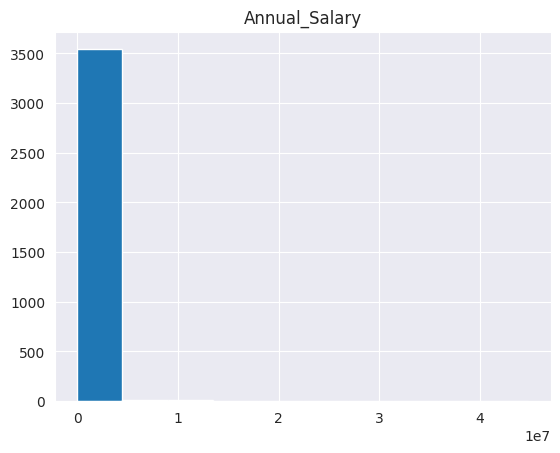

In [44]:
#Annual salary distribution
df.hist('Annual_Salary')
plt.show()

Below we are trying to see who the majority of 0 are

In [45]:
filtered_data = df[df['Annual_Salary'] == 0]
print(filtered_data.shape[0])
filtered_data.head(3)

797


,ResponseId,Developer_Description,Employment_Status,Remote_vs_Onsite,Outofwork_Coding,Education_Level,Learn_Code_Method,Learn_Code_Source,Code_Certifications,Coding_Experience,...,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary,continents
5,6,"I am not primarily a developer, but I write co...","Student, full-time",None of the Above,None of the Above,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media,None of the Above,None of the Above,15,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,0.0,Europe
6,7,I code primarily as a hobby,"Student, part-time",None of the Above,None of the Above,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Stack Overflow,None of the Above,3,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,0.0,Asia
7,8,I am a developer by profession,"Not employed, but looking for work",None of the Above,None of the Above,Some college/university study without earning ...,Online Courses or Certification,None of the Above,Coursera,1,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,0.0,Asia


In [46]:
avedf = df[(df["Employment_Status"] == "Student, full-time") | (df["Employment_Status"] == "Student, part-time") &
           (df["Annual_Salary"]!= 0.0)]
avedf.Annual_Salary.value_counts()

0.0    521
Name: Annual_Salary, dtype: int64

In [47]:
filtered_data.groupby('continents').Employment_Status.value_counts()

continents     Employment_Status                     
Africa         Student, full-time                          4
               Student, part-time                          3
               I prefer not to say                         1
               Not employed, and not looking for work      1
               Not employed, but looking for work          1
Asia           Student, full-time                         63
               Not employed, but looking for work         17
               Student, part-time                         14
               Not employed, and not looking for work      7
               I prefer not to say                         5
               Retired                                     1
Europe         Student, full-time                        248
               Student, part-time                         50
               Not employed, but looking for work         31
               Not employed, and not looking for work     22
               I prefer not to 

In [48]:
filtered_data.continents.value_counts()

Europe           364
North America    248
Asia             107
Oceania           34
South America     34
Africa            10
Name: continents, dtype: int64

In [49]:
df.continents.value_counts()

North America    1521
Europe           1387
Asia              364
Oceania           142
South America     119
Africa             36
Name: continents, dtype: int64

In [50]:
#create a function to check for Outliers
def check_outliers(data):
    """A function to check for outliers in the numeric columns using Z-Score"""
    series_num = data["Annual_Salary"]
    mean = np.mean(series_num)
    std = np.std(series_num)
    threshold = 3
    outliers = data[np.abs((series_num - mean) / std) > threshold]
    return outliers

outliers = check_outliers(df)

print("The Number of Outliers in the 'Annual_Salary' Column:", len(outliers))
print("Outliers:")
outliers.head(2)

The Number of Outliers in the 'Annual_Salary' Column: 34
Outliers:


,ResponseId,Developer_Description,Employment_Status,Remote_vs_Onsite,Outofwork_Coding,Education_Level,Learn_Code_Method,Learn_Code_Source,Code_Certifications,Coding_Experience,...,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary,continents
117,118,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,Some college/university study without earning ...,Books / Physical media,None of the Above,None of the Above,32,...,15-30 minutes a day,Very short,DevOps function,Yes,No,Yes,Appropriate in length,Easy,6000000.0,North America
201,202,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation,Coursera,9,...,Less than 15 minutes a day,Somewhat long,Innersource initiative,Yes,Yes,Yes,Appropriate in length,Neither easy nor difficult,44790396.0,Europe


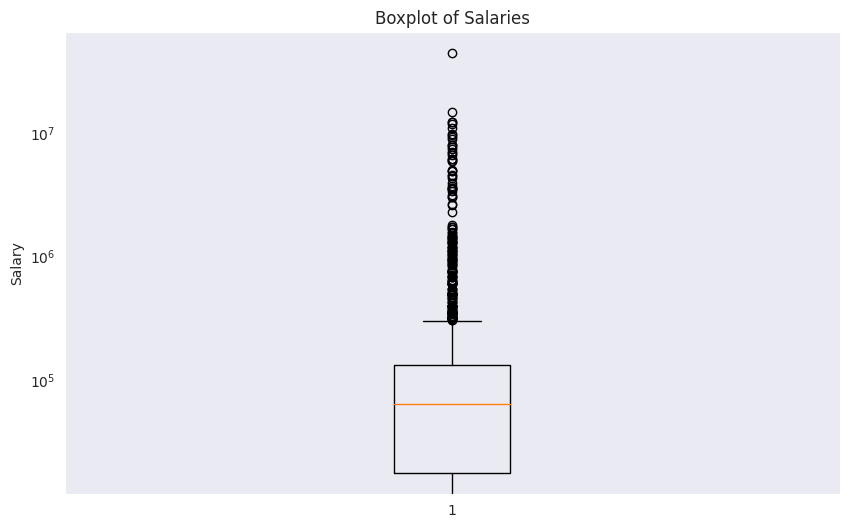

In [51]:
#boxplot to check outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df['Annual_Salary'])
plt.ylabel('Salary')
plt.yscale('log')
plt.title('Boxplot of Salaries')
plt.show()

In [52]:
#summary of above
print("We have ", len(outliers))
print("The lowest Outlier in salary is :", outliers.Annual_Salary.min())
print("The highest Outlier in salary is  :", outliers.Annual_Salary.max())

We have  34
The lowest Outlier in salary is : 3408000.0
The highest Outlier in salary is  : 44790396.0


### Exploratory Data Analysis

We will explore a few varibales below to help us better understand our data:
- **Developer demographics** : continent, years of experience - work, age, gender, coding, education level, , where learned coding, remote vs onsite
- **Developer tools**: Language worked with, database worked with, cloud platforms worked with, version control, operating system
- **Annual_Salary** - histogram, boxplot. salary by continent, by educational level, years of experience

#### Developer Distribution by Continent
Most of the data was gathered from developers in Europe, North America and Asia.

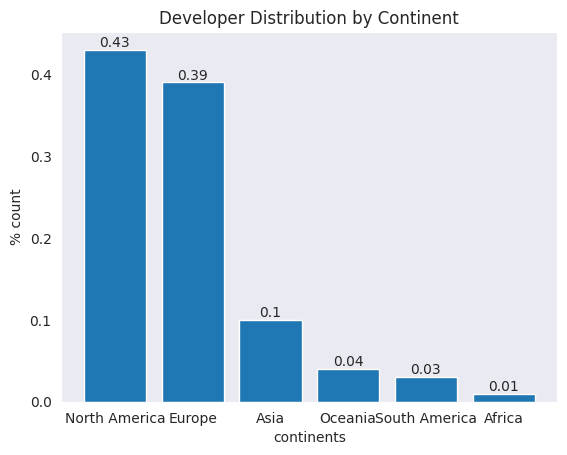

In [53]:
# plt developer distribution by continent
con = round(df.continents.value_counts(normalize=True), 2)
plt.bar(con.index, con.values)
plt.title('Developer Distribution by Continent')
for i, v in enumerate(con.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('continents')
plt.ylabel('% count');


#### Years of Experience : Professionnal & Coding

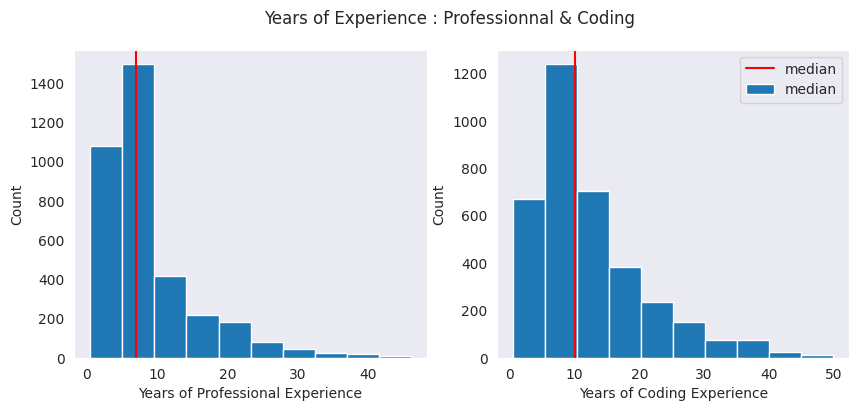

In [54]:
# convert cols from 'object' to 'float' type
df['Pro_Experience'] = df.Pro_Experience.astype('float')
df['Coding_Experience'] = df.Coding_Experience.astype('float')

fig, axes = plt.subplots(ncols=2, figsize=(10,4))

fig.suptitle('Years of Experience : Professionnal & Coding')
axes[0].hist(df.Pro_Experience)
axes[0].axvline(df.Pro_Experience.median(), c='r')
axes[0].set_xlabel('Years of Professional Experience')
axes[0].set_ylabel('Count')
axes[1].hist(df.Coding_Experience)
axes[1].axvline(df.Coding_Experience.median(), c='r')
axes[1].set_xlabel('Years of Coding Experience')
axes[1].set_ylabel('Count')

plt.legend(['median', 'median']);

#### Age and Gender Distribution

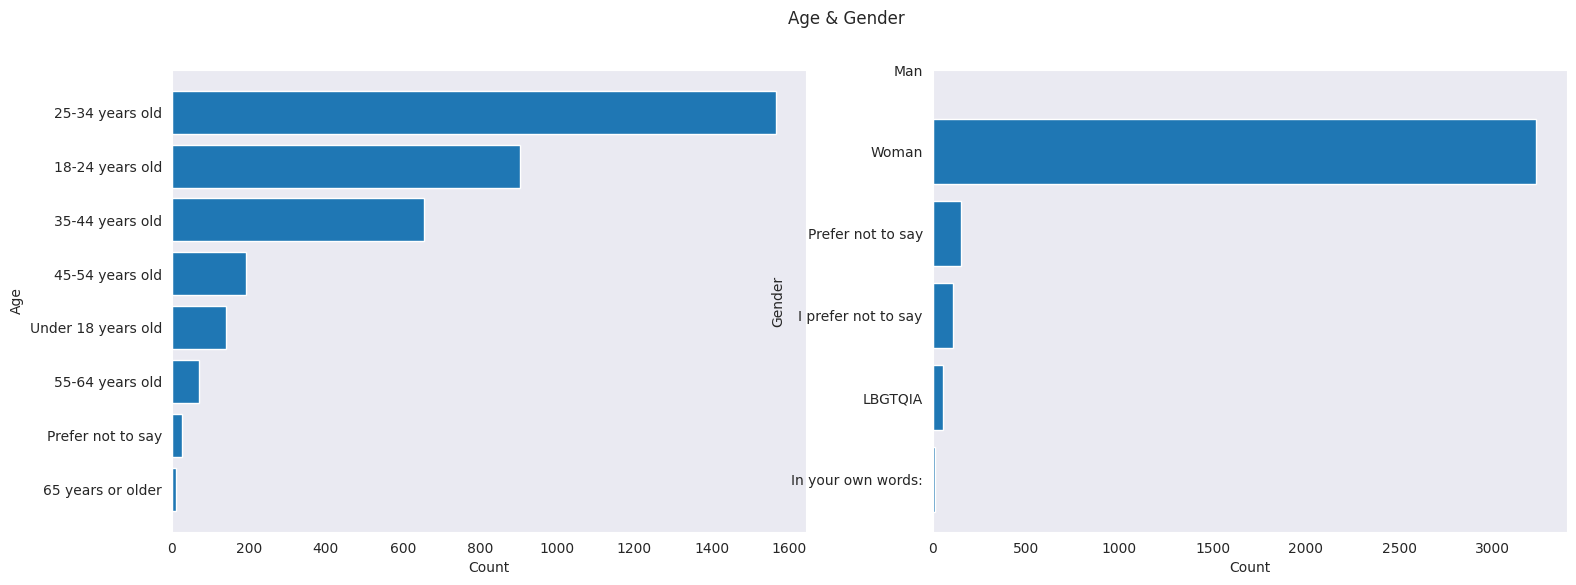

In [55]:
genl = ['In your own words:',
       'LBGTQIA',
       'I prefer not to say', 'Prefer not to say', 'Woman', 'Man']

#
agedf = df.Age.value_counts().sort_values(ascending=True)
genddf = df.Gender.value_counts().sort_values(ascending=True)

fig, axes = plt.subplots(ncols=2, figsize=(18,6))

fig.suptitle('Age & Gender')
axes[0].barh(agedf.index, agedf.values)
axes[0].set_ylabel('Age')
axes[0].set_xlabel('Count')
axes[1].barh(genddf.index, genddf.values)
axes[1].set_ylabel('Gender')
axes[1].set_xlabel('Count')
axes[1].set_yticks(range(len(genl)))
axes[1].set_yticklabels(genl);


#### Source of Coding Skills

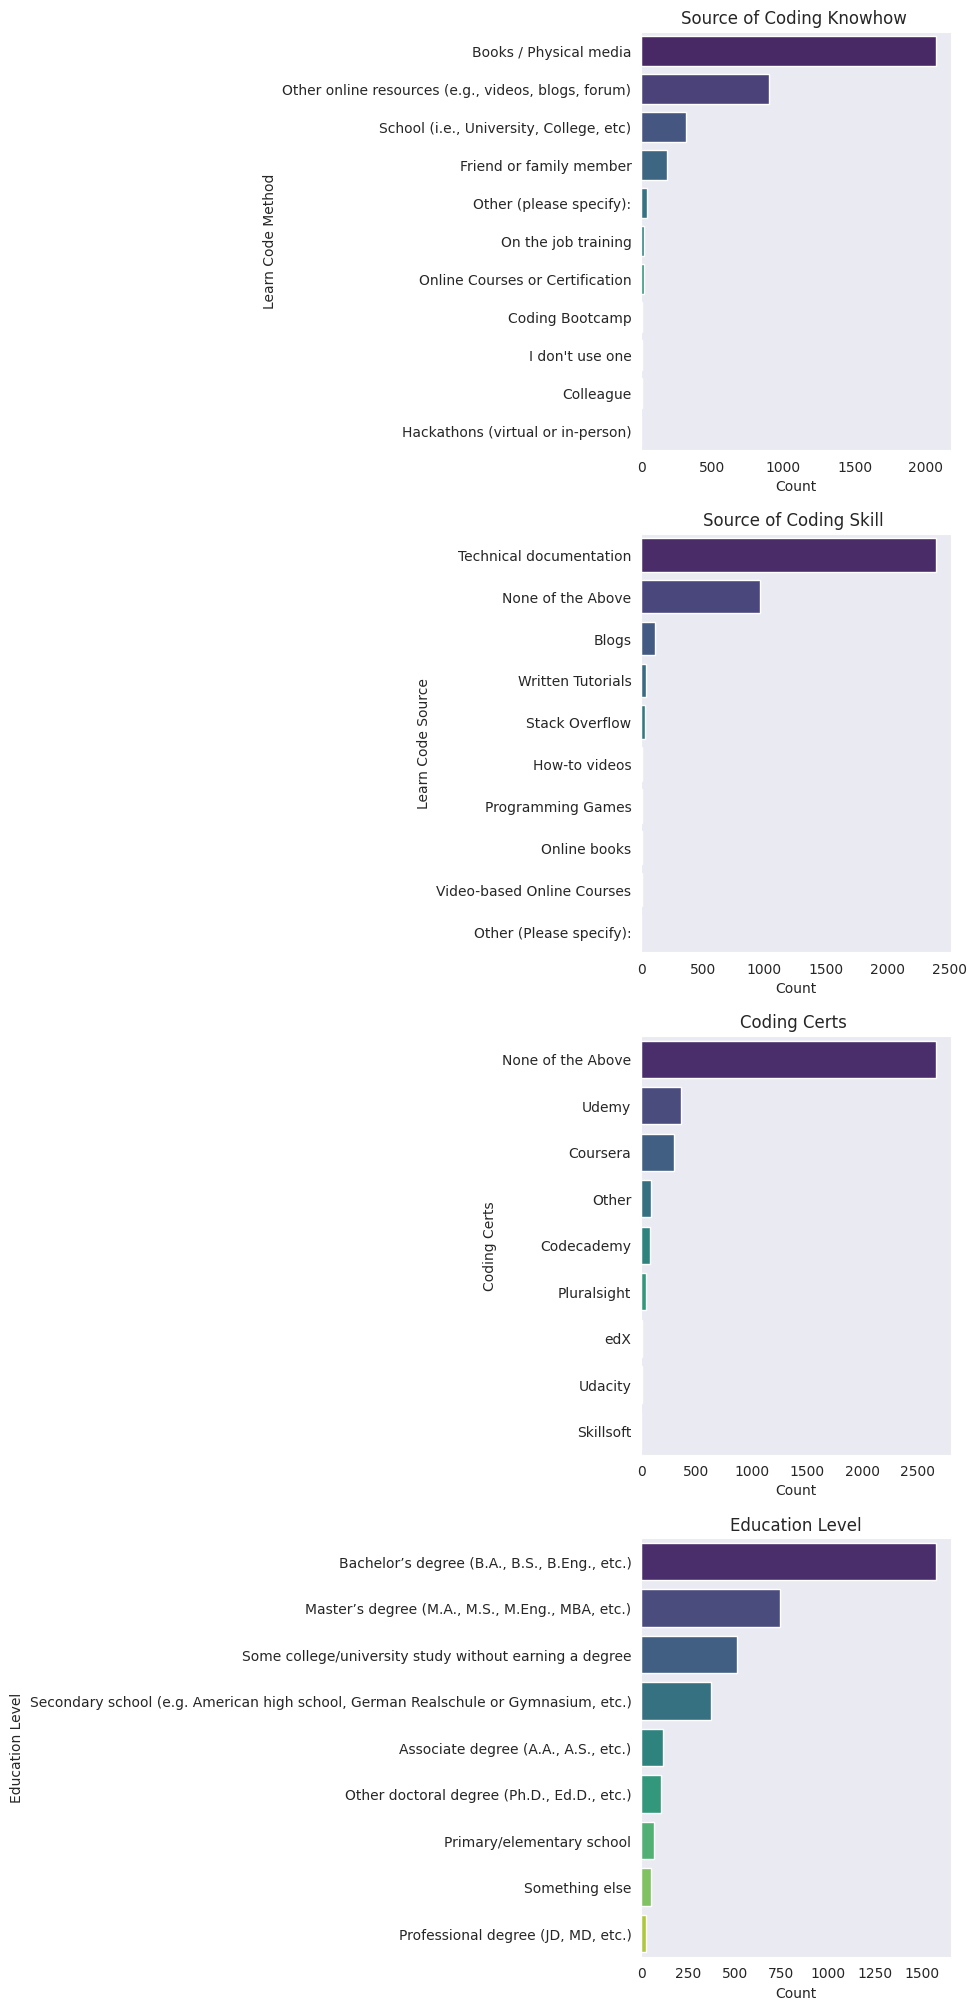

<Figure size 1000x600 with 0 Axes>

In [56]:
fig, axes = plt.subplots(nrows=4, figsize=(4,25))
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Learn_Code_Method', order=df['Learn_Code_Method'].value_counts().index, palette='viridis', ax=axes[0])
axes[0].set_ylabel('Learn Code Method')
axes[0].set_xlabel('Count')
axes[0].set_title('Source of Coding Knowhow ')

sns.countplot(data=df, y='Learn_Code_Source', order=df['Learn_Code_Source'].value_counts().index, palette='viridis', ax=axes[1])
axes[1].set_ylabel('Learn Code Source')
axes[1].set_xlabel('Count')
axes[1].set_title('Source of Coding Skill ')

sns.countplot(data=df, y='Code_Certifications', order=df['Code_Certifications'].value_counts().index, palette='viridis', ax=axes[2])
axes[2].set_ylabel('Coding Certs')
axes[2].set_xlabel('Count')
axes[2].set_title('Coding Certs ')

sns.countplot(data=df, y='Education_Level', order=df['Education_Level'].value_counts().index, palette='viridis', ax=axes[3])
axes[3].set_ylabel('Education Level')
axes[3].set_xlabel('Count')
axes[3].set_title('Education Level');

#### Employment Status & Work Style


In [57]:
empl = ['Retired', 'I prefer not to say',
       'Not employed, not searching', 'Employed, part-time',
       'Not employed, searching', 'Student, part-time',
       'consultant/freelance',
       'Student, full-time', 'Employed, full-time']

wkstlls = ['Full in-person', 'None',
       'Hybrid', 'Fully remote']

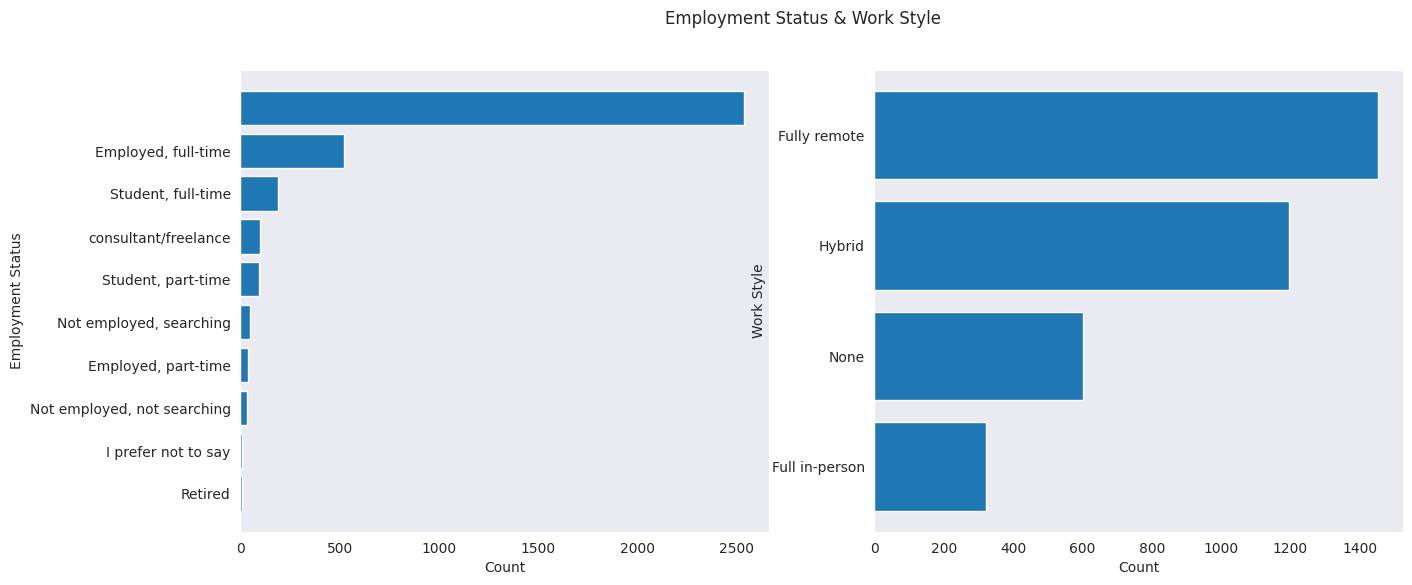

In [58]:
emp = df.Employment_Status.value_counts().sort_values(ascending=True)
wkstl = df.Remote_vs_Onsite.value_counts().sort_values(ascending=True)

fig, axes = plt.subplots(ncols=2, figsize=(15,6))

fig.suptitle('Employment Status & Work Style')
axes[0].barh(emp.index, emp.values)
axes[0].set_ylabel('Employment Status')
axes[0].set_xlabel('Count')
axes[0].set_yticks(range(len(empl)))
axes[0].set_yticklabels(empl)
axes[1].barh(wkstl.index, wkstl.values)
axes[1].set_ylabel('Work Style')
axes[1].set_xlabel('Count')
axes[1].set_yticks(range(len(wkstlls)))
axes[1].set_yticklabels(wkstlls);


#### Annual Salary

#### Salary Distribution by Continent

North American developers are the most well-paid, followed by Oceania and Europe

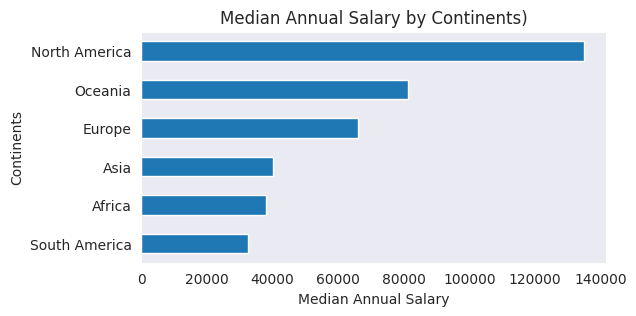

In [59]:
salo_sorted = salo.sort_values(ascending=True)
plt.figure(figsize=(6, 3))
salo_sorted.plot(kind='barh')
plt.ylabel('Continents')
plt.xlabel('Median Annual Salary')
plt.title('Median Annual Salary by Continents)');

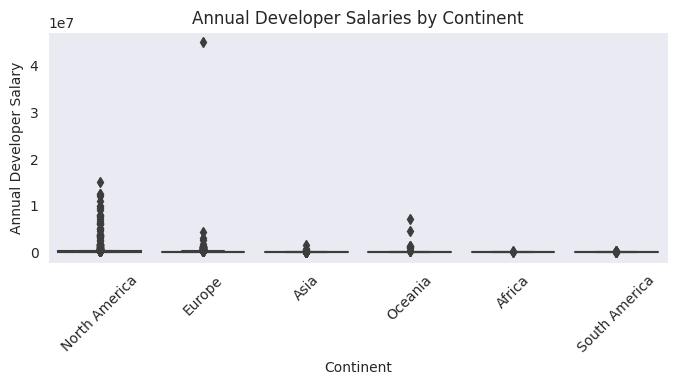

In [60]:
plt.figure(figsize=(8, 3))
ax = sns.boxplot(x='continents', y='Annual_Salary', data=df)
plt.xticks(rotation=45)
plt.xlabel('Continent')
plt.ylabel('Annual Developer Salary')
plt.title('Annual Developer Salaries by Continent')
plt.show()

#### Developer Tools By Salary

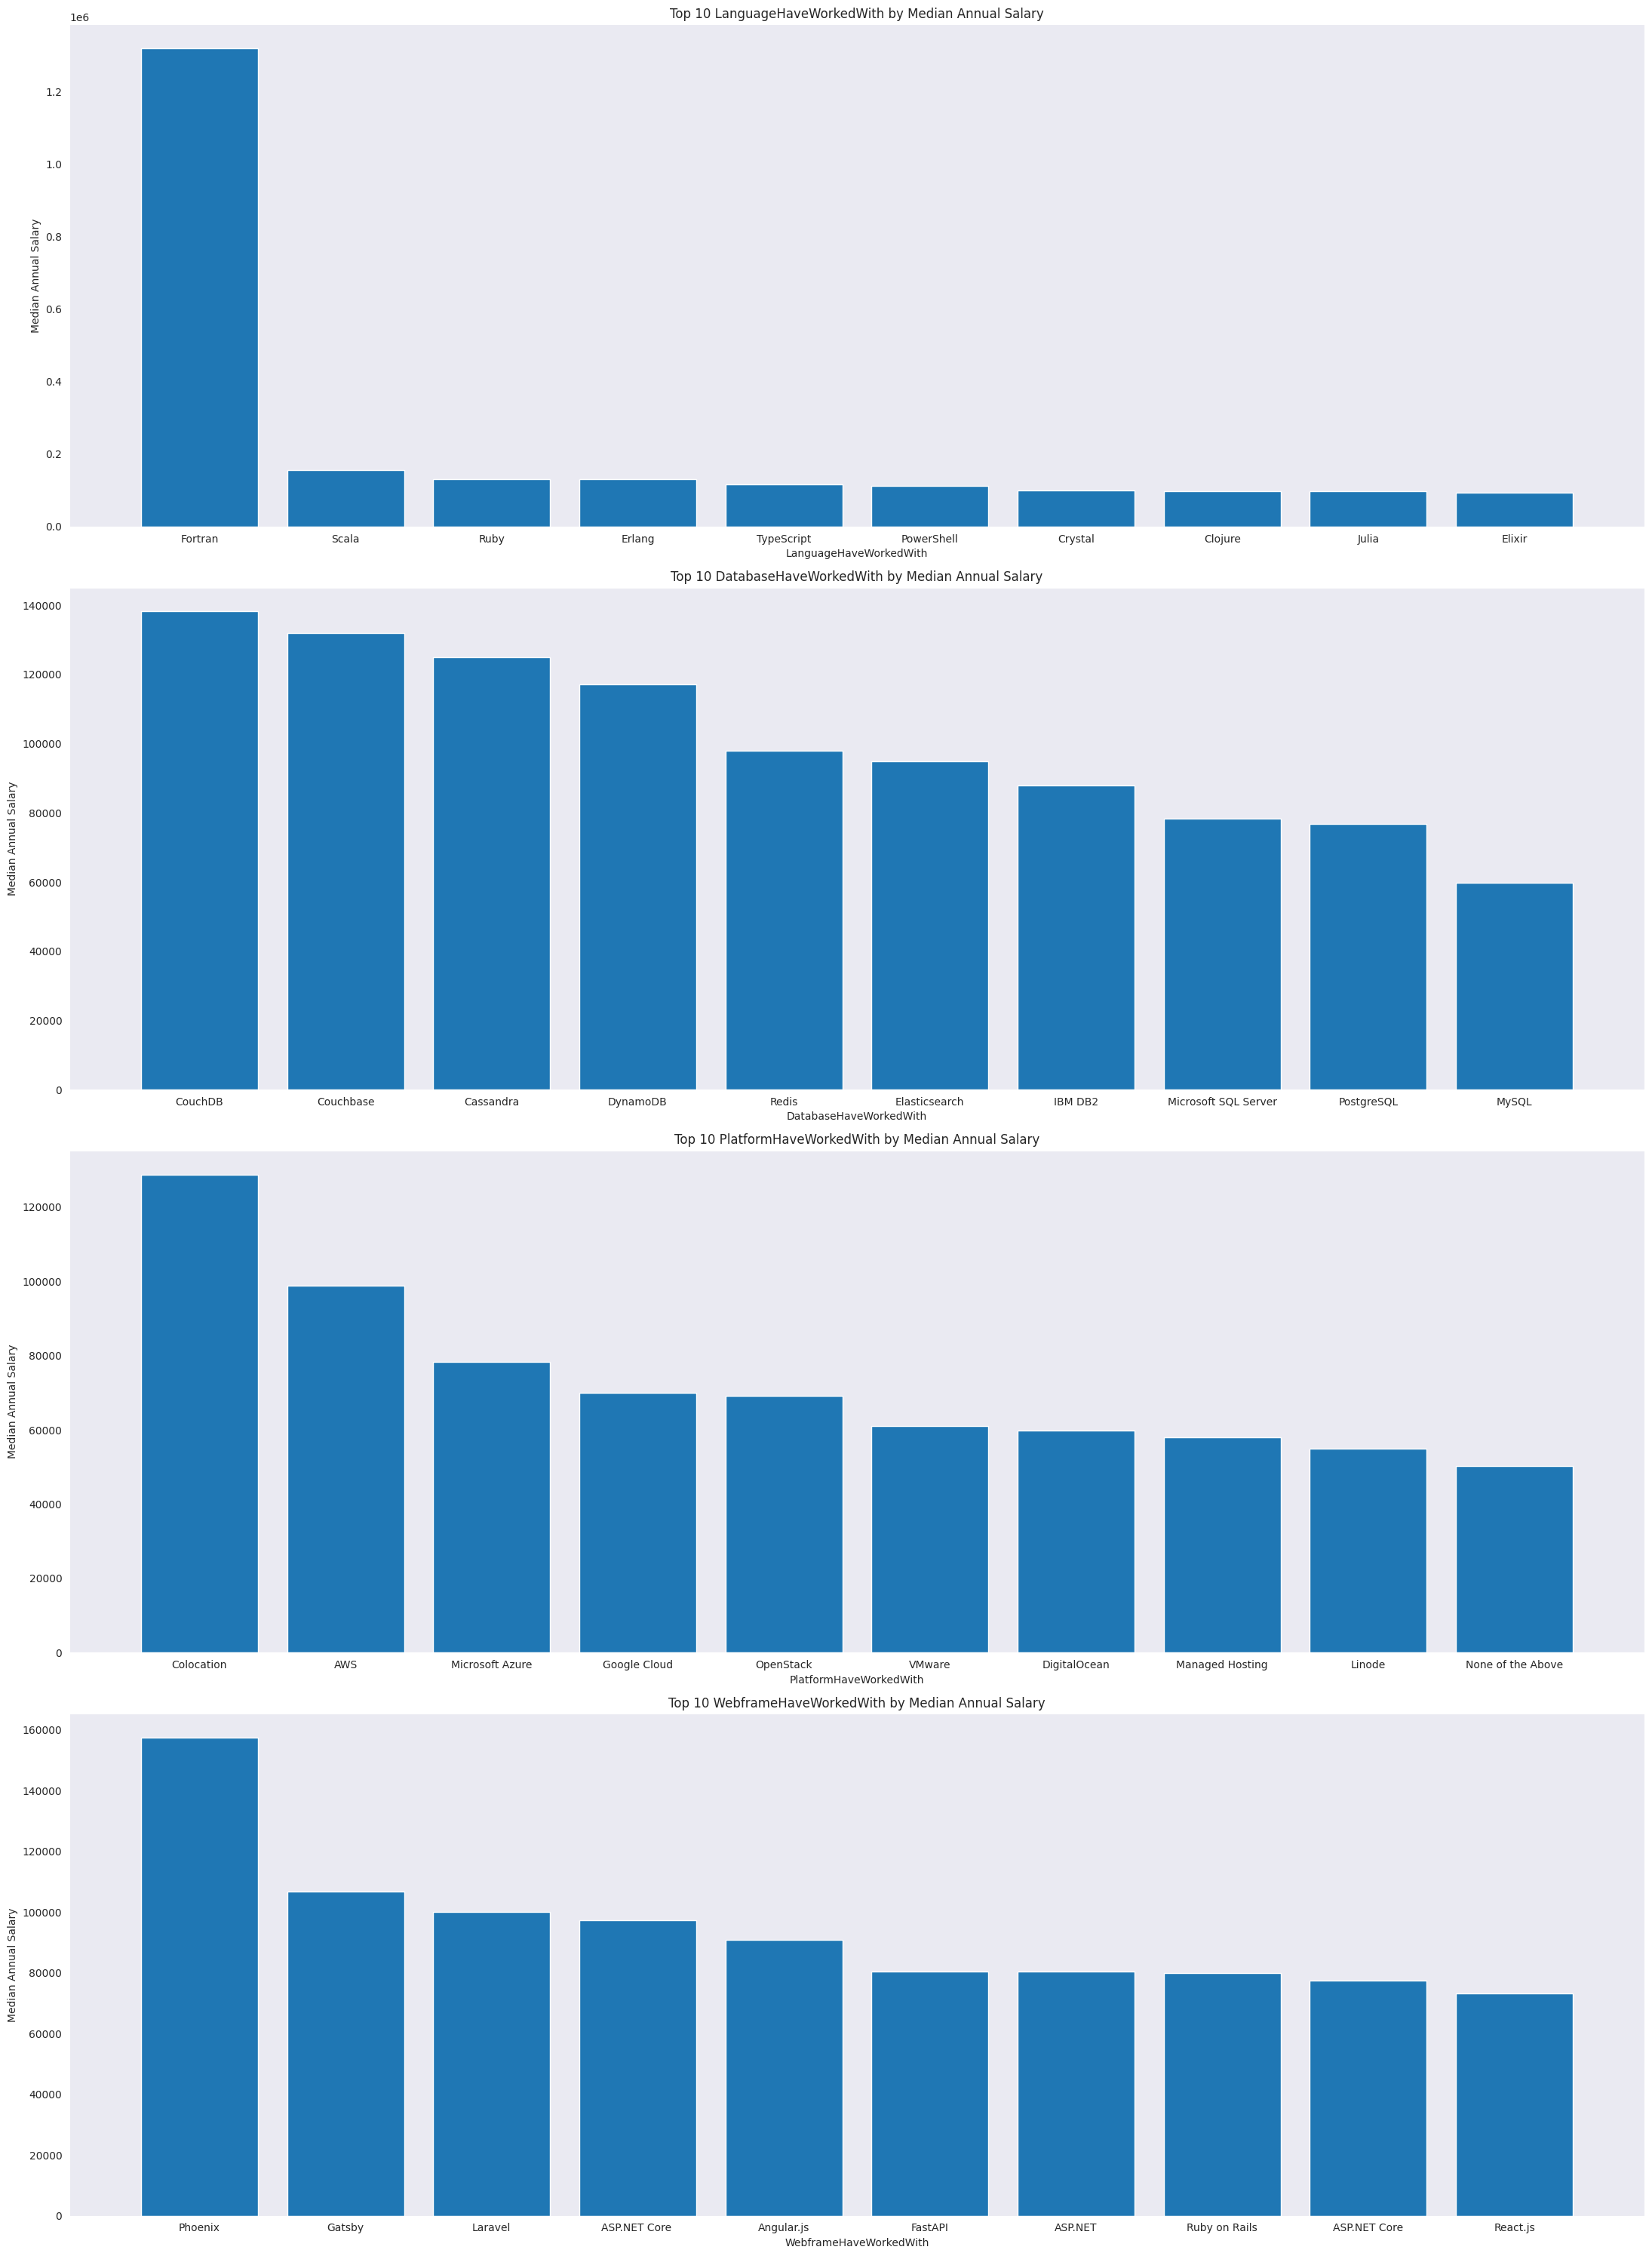

In [61]:
# Create subplots with 4 rows
fig, axes = plt.subplots(nrows=4, figsize=(22, 30))
# Define the columns to plot
columns_to_plot = ['LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith']
# Iterate over the columns and create plots
for i, column in enumerate(columns_to_plot):
    # Group the data by column and calculate the average annual salary
    median_salary_by_column = df.groupby(column)['Annual_Salary'].median().reset_index()
    median_salary_by_column = median_salary_by_column.sort_values('Annual_Salary', ascending=False)
    top_10_categories = median_salary_by_column.head(10)
    # Create the bar plot for each column
    axes[i].bar(top_10_categories[column], top_10_categories['Annual_Salary'])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Median Annual Salary')
    axes[i].set_title(f'Top 10 {column} by Median Annual Salary')
    #axes[i].tick_params(axis='x', rotation=45, rotation_mode='anchor', ha='right')
# Adjust layout and display the plots
plt.tight_layout()
plt.show()

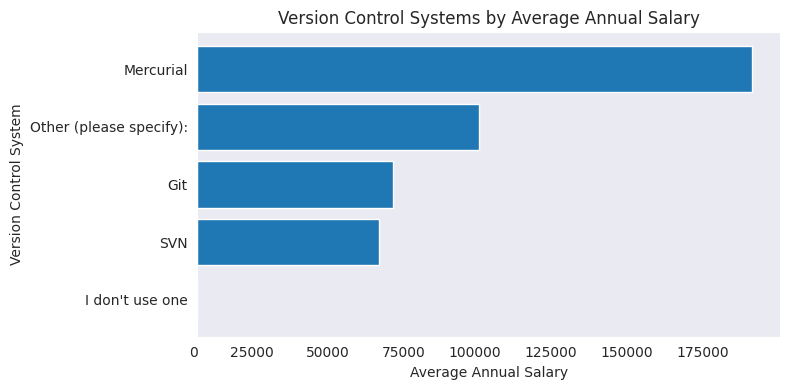

In [62]:
# Group the data by VersionControlSystem and calculate the median annual salary
average_salary_by_version_control = df.groupby('VersionControlSystem')['Annual_Salary'].median().reset_index()
average_salary_by_version_control = average_salary_by_version_control.sort_values('Annual_Salary', ascending=True)
# Create the vertical bar plot for VersionControlSystem
plt.figure(figsize=(8, 4))
plt.barh(average_salary_by_version_control['VersionControlSystem'], average_salary_by_version_control['Annual_Salary'])
plt.ylabel('Version Control System')
plt.xlabel('Average Annual Salary')
plt.title('Version Control Systems by Average Annual Salary')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

## Multivariate Analysis

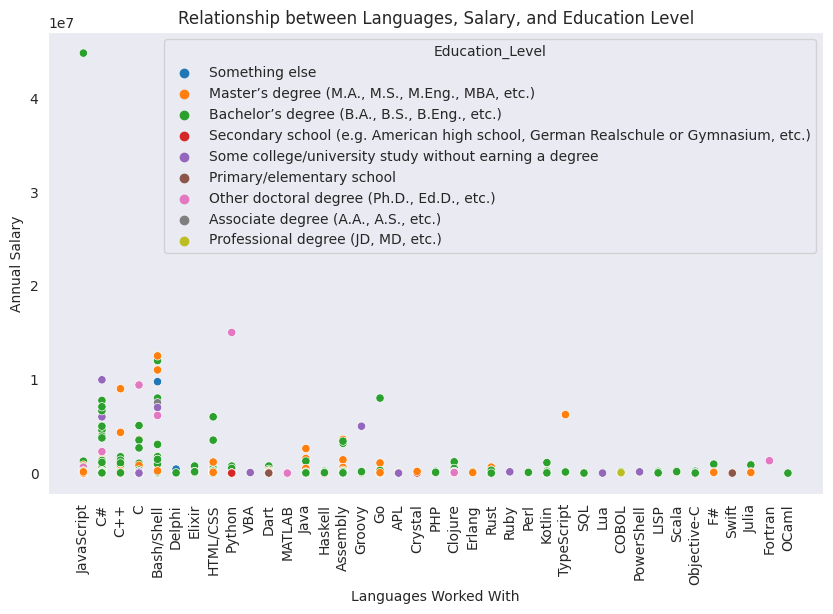

In [63]:
# Subset the relevant columns
subset_df = df[["LanguageHaveWorkedWith", "Annual_Salary", "Education_Level"]]

# Filter out rows with missing values in any of the selected columns
subset_df = subset_df.dropna(subset=["LanguageHaveWorkedWith", "Annual_Salary", "Education_Level"])

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset_df, x="LanguageHaveWorkedWith", y="Annual_Salary", hue="Education_Level")
plt.xticks(rotation=90)
plt.xlabel("Languages Worked With")
plt.ylabel("Annual Salary")
plt.title("Relationship between Languages, Salary, and Education Level")
plt.show()

# Data Preprocessing

### Initial Feature Selection & Data Encoding
Our data mostly contains categorical variables that need to be preprocessed via encoding to make it ready for modelling
Before encoding the data, based on domain knowledge, we will select the required features that are most likely to affect `Annual_Salary`. Below, `deletedf` (38 columns) shows the list of columns to be dropped, while `selectorf` (56 columns), shows the columns to be used in preprocessing

In [64]:
deletedf = ['LanguageWantToWorkWith', 'DatabaseWantToWorkWith', 'PlatformWantToWorkWith', 'WebframeWantToWorkWith',
'MiscTechWantToWorkWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsWantToWorkWith', 'Proj_Mgmt_WantToWorkWith',
'Proj_Mgmt_SyncWantToWorkWith', 'Blockchain_Sentiment', 'New_Stack_Overfl_Sites', 'SOVisitFreq', 'SOAccount_Ownership',
'SOA_ParticipationFreq', 'Belong_SO_Comm', 'Participation_PDS', 'Contributor_or_Manager', 'Extroverted', 'Siloed_Teams',
'Information_Availability', 'Well_Resourced', 'Info_Answ_Resource', 'Recurring_Responses', 'Workflow_Interruptions',
'External_Team_Assistance', 'External_Team_Interaction', 'Knowledge_Silos', 'TimeSearching_Answers', 'TimeAnswering',
'Onboarding_Duration', 'ProfessionalTech', 'Is_Involved_Onboarding', 'Employer_Learning_Resources', 'Learning_Support',
'SurveyLength', 'SurveyEase', 'Purchase_Research', 'OpSysPersonal_use', 'VersionControlSystem', 'VCInteraction',
'Proj_Mgmt_HVWorkedWith', 'Proj_Mgmt_SyncHaveWorkedWith', 'Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Disability',
'MentalHealth', 'continents', 'Learn_Code_Method', 'Learn_Code_Source', 'DatabaseHaveWorkedWith', 'WebframeHaveWorkedWith',
'MiscTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith', 'OrgSize', 'Coding_Experience', 'Outofwork_Coding',
'PlatformHaveWorkedWith', 'OpSysProfessional_use', 'ToolsTechHaveWorkedWith']

In [65]:
selectorf = ['Developer_Description', 'Employment_Status',
       'Remote_vs_Onsite', 'Outofwork_Coding', 'Education_Level',
       'Learn_Code_Method', 'Learn_Code_Source', 'Code_Certifications',
       'Coding_Experience', 'Pro_Experience', 'DevType', 'OrgSize',
       'PurchaseInfluence', 'Country',
       'LanguageHaveWorkedWith',
       'DatabaseHaveWorkedWith',
       'PlatformHaveWorkedWith',
       'WebframeHaveWorkedWith',
       'MiscTechHaveWorkedWith',
       'ToolsTechHaveWorkedWith',
       'NEWCollabToolsHaveWorkedWith',
       'OpSysProfessional_use', 'OpSysPersonal_use', 'VersionControlSystem',
       'VCInteraction', 'Proj_Mgmt_HVWorkedWith',
       'Proj_Mgmt_SyncHaveWorkedWith',
       'Age',
       'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Disability',
       'MentalHealth', 'Annual_Salary',
       'continents']

In [66]:
print(len(deletedf), len(selectorf))

62 36


In [67]:
columns_to_binary_encode = ['Employment_Status', 'ProfessionalTech', 'OpSysPersonal_use', 'OpSysProfessional_use',
                            'Remote_vs_Onsite','Developer_Description', 'Outofwork_Coding', 'Learn_Code_Method',
                            'Learn_Code_Source', 'Code_Certifications', 'DevType', 'Purchase_Research', 'Country',
                            'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'LanguageWantToWorkWith',
                            'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
                            'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
                            'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
                            'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'VersionControlSystem',
                            'VCInteraction', 'Proj_Mgmt_HVWorkedWith', 'Proj_Mgmt_WantToWorkWith',
                            'Proj_Mgmt_SyncHaveWorkedWith', 'Proj_Mgmt_SyncWantToWorkWith', 'New_Stack_Overfl_Sites',
                            'SOAccount_Ownership', 'Belong_SO_Comm', 'Gender', 'Trans', 'Sexuality', 'Ethnicity',
                            'Disability', 'MentalHealth', 'Participation_PDS', 'Contributor_or_Manager',
                            'Is_Involved_Onboarding', 'Employer_Learning_Resources', 'Learning_Support', 'continents' ]

In [68]:
columns_to_ordinal_encode = ['Education_Level', 'OrgSize', 'PurchaseInfluence', 'Blockchain_Sentiment', 'SOVisitFreq',
                             'SOA_ParticipationFreq', 'Age', 'Extroverted', 'Siloed_Teams', 'Information_Availability',
                             'Well_Resourced', 'Info_Answ_Resource', 'Recurring_Responses', 'Workflow_Interruptions',
                             'External_Team_Assistance', 'External_Team_Interaction', 'Knowledge_Silos',
                             'TimeSearching_Answers', 'TimeAnswering', 'Onboarding_Duration', 'SurveyLength', 'SurveyEase']

In [69]:
numeric_cols = ['Coding_Experience', 'Pro_Experience','Annual_Salary']

In [70]:
columns_to_binary_encode_set = set(columns_to_binary_encode)
columns_to_ordinal_encode_set = set(columns_to_ordinal_encode)
deletedf_set = set(deletedf)

final_to_binary_encode = list(columns_to_binary_encode_set - deletedf_set)
final_to_ordinal_encode = list(columns_to_ordinal_encode_set - deletedf_set)

print(len(final_to_binary_encode))
print(len(final_to_ordinal_encode))
print(len(selectorf))

7
2
36


In [71]:
# final cols to work with
#final_to_binary_encode
#final_to_ordinal_encode
#numeric_cols


In [72]:
# drop work experience as its correlated to
# professional experience, hence duplication
df = dropping_columns(df, 'WorkExp')
df = dropping_columns(df, 'ResponseId')

In [73]:
# perform binary encoding
def perform_binary_encoding(df, columns):
    # Create a copy of the original DataFrame
    df_encoded = df.copy()
    # Perform Binary Encoding for each specified column
    for column in columns:
        binary_encoder = ce.BinaryEncoder(cols=[column])
        df_encoded = binary_encoder.fit_transform(df_encoded)
    return df_encoded
# Perform Binary Encoding
df_encoded_binary = perform_binary_encoding(df, final_to_binary_encode)
# Display the encoded dataframe
df_encoded_binary

,Developer_Description_0,Developer_Description_1,Developer_Description_2,Employment_Status_0,Employment_Status_1,Employment_Status_2,Employment_Status_3,Remote_vs_Onsite_0,Remote_vs_Onsite_1,Remote_vs_Onsite_2,...,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary,continents
1,0,0,1,0,0,0,1,0,0,1,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Too long,Difficult,132000.0,North America
2,0,1,0,0,0,0,1,0,1,0,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Neither easy nor difficult,40205.0,Europe
3,0,0,1,0,0,0,1,0,0,1,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,215232.0,Asia
4,0,0,1,0,0,0,1,0,1,0,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Too long,Easy,132000.0,North America
5,0,1,0,0,0,1,0,0,1,1,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,0.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3600,1,0,1,0,0,0,1,0,0,1,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Too long,Neither easy nor difficult,132000.0,North America
3601,0,1,0,0,0,1,0,0,1,1,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,0.0,Asia
3602,0,1,0,0,0,0,1,0,1,0,...,15-30 minutes a day,Just right,Continuous integration (CI) and (more often) c...,Yes,Yes,Yes,Appropriate in length,Easy,240000.0,North America
3603,1,0,0,0,0,0,1,0,0,1,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,23215.0,Asia


In [74]:
# perform ordinal encoding
def perform_ordinal_encoding(df, columns):
    # Create a copy of the original DataFrame
    df_encod = df.copy()
    # Perform Ordinal Encoding for each specified column
    for column in columns:
        ordinal_encoder = ce.OrdinalEncoder(cols=[column])
        df_encod[column] = ordinal_encoder.fit_transform(df_encod[column])
    return df_encod
# Perform Ordinal Encoding
df_encod = perform_ordinal_encoding(df_encoded_binary, final_to_ordinal_encode)
# Display the encoded dataframe
df_encod.head(5)

,Developer_Description_0,Developer_Description_1,Developer_Description_2,Employment_Status_0,Employment_Status_1,Employment_Status_2,Employment_Status_3,Remote_vs_Onsite_0,Remote_vs_Onsite_1,Remote_vs_Onsite_2,...,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary,continents
1,0,0,1,0,0,0,1,0,0,1,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Too long,Difficult,132000.0,North America
2,0,1,0,0,0,0,1,0,1,0,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Neither easy nor difficult,40205.0,Europe
3,0,0,1,0,0,0,1,0,0,1,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,215232.0,Asia
4,0,0,1,0,0,0,1,0,1,0,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Too long,Easy,132000.0,North America
5,0,1,0,0,0,1,0,0,1,1,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,0.0,Europe


In [75]:
# drop deleted columns
df_encod = dropping_columns(df_encod, deletedf)

# confirm no categorical variables
print(df_encod.select_dtypes(include='object').columns)
df_encod.head()

Index([], dtype='object')


,Developer_Description_0,Developer_Description_1,Developer_Description_2,Employment_Status_0,Employment_Status_1,Employment_Status_2,Employment_Status_3,Remote_vs_Onsite_0,Remote_vs_Onsite_1,Remote_vs_Onsite_2,...,Country_4,Country_5,Country_6,LanguageHaveWorkedWith_0,LanguageHaveWorkedWith_1,LanguageHaveWorkedWith_2,LanguageHaveWorkedWith_3,LanguageHaveWorkedWith_4,LanguageHaveWorkedWith_5,Annual_Salary
1,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,132000.0
2,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,40205.0
3,0,0,1,0,0,0,1,0,0,1,...,0,1,1,0,0,0,0,1,0,215232.0
4,0,0,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,132000.0
5,0,1,0,0,0,1,0,0,1,1,...,1,0,1,0,0,0,0,1,1,0.0


In [76]:
corr = pd.DataFrame(abs(df_encod.corr()['Annual_Salary']).sort_values(ascending=False))
corr

,Annual_Salary
Annual_Salary,1.000000
PurchaseInfluence,0.084993
Employment_Status_2,0.082508
Employment_Status_3,0.079169
Country_5,0.066517
Country_4,0.058568
Country_6,0.056575
Country_2,0.052937
DevType_3,0.050511
Country_3,0.050132


After reviewing the correlation of the variables, we narrowed down on the variables below by looking at the top correlations to `Annual_Salary`. We also used domain knowledge to include some columns like `Education_Level` and `Code_Certifications`.

In [77]:
selectfeature = ['Code_Certifications', 'Education_Level', 'Employment_Status', 'PurchaseInfluence', 'OrgSize',
                 'Coding_Experience', 'Country', 'Pro_Experience', 'Developer_Description', 'Outofwork_Coding',
                 'Remote_vs_Onsite', 'PlatformHaveWorkedWith', 'OpSysProfessional_use', 'DevType', 'LanguageHaveWorkedWith',
                 'ToolsTechHaveWorkedWith']

In [78]:
ordinalf = ['OrgSize', 'PurchaseInfluence', 'Education_Level']

In [79]:
binaryf = ['Code_Certifications', 'Employment_Status', 'Country', 'Developer_Description', 'Outofwork_Coding',
           'Remote_vs_Onsite', 'PlatformHaveWorkedWith', 'OpSysProfessional_use', 'DevType', 'LanguageHaveWorkedWith',
           'ToolsTechHaveWorkedWith']

In [80]:
numericf = ['Coding_Experience', 'Pro_Experience']

In [81]:
print('data types for cols to ordinal encode')
print('_______________________________________\n')
print(df[ordinalf].dtypes)
print('\ndata types for cols to binary encode')
print('_______________________________________\n')
print(df[binaryf].dtypes)
print('\ndata types for remaining cols')
print('_______________________________________\n')
print(df[numericf].dtypes)


data types for cols to ordinal encode
_______________________________________

OrgSize              object
PurchaseInfluence    object
Education_Level      object
dtype: object

data types for cols to binary encode
_______________________________________

Code_Certifications        object
Employment_Status          object
Country                    object
Developer_Description      object
Outofwork_Coding           object
Remote_vs_Onsite           object
PlatformHaveWorkedWith     object
OpSysProfessional_use      object
DevType                    object
LanguageHaveWorkedWith     object
ToolsTechHaveWorkedWith    object
dtype: object

data types for remaining cols
_______________________________________

Coding_Experience    float64
Pro_Experience       float64
dtype: object


In [82]:
print(len(ordinalf)+len(binaryf)++len(numericf), '=', len(selectfeature))

16 = 16


#### Final List of Selected Features

In [83]:
finalf = ['Code_Certifications', 'Education_Level', 'Employment_Status', 'PurchaseInfluence', 'Country', 'Pro_Experience',
'Remote_vs_Onsite', 'DevType', 'LanguageHaveWorkedWith', 'Developer_Description']

finalbi = ['Code_Certifications', 'Employment_Status', 'Country', 'Remote_vs_Onsite', 'DevType', 'LanguageHaveWorkedWith',
           'Developer_Description']
finalord = ['PurchaseInfluence', 'Education_Level']
finalnum = ['Pro_Experience']

In [84]:
print(len(finalf), '=', len(finalbi)+len(finalord)+len(finalnum))

10 = 10


In [85]:
#pyr = pd.read_csv(r'C:\Users\ADMIN\OneDrive - Kantar\XXXXXXXX\POV1\Data Science\Moringa\data\survey_results_public_2021.csv')

In [86]:
# Create the 'continents' column by mapping the 'countries' column to the continents dictionary
#pyr['continents'] = pyr['Country'].map({country: continent for continent, countries in continents.items()
#                                        for country in countries})

In [87]:
# misplaced. plug into the data merging section
# go back last 5 years and extract africa data
#pyr.continents.value_counts()

In [88]:
# misplaced. plug into the data merging section
# go back last 5 years and extract africa data
#pyr.groupby('continents').ConvertedCompYearly.count()

In [89]:
# to merge all Africa data from the 5 previous countries
# to our 2022 dataframe

#### Encode Categorical Variables of Final Features

In [90]:
df = dropping_columns(df, deletedf)
binary_df = perform_binary_encoding(df, finalbi)
ordinal_df = perform_ordinal_encoding(binary_df, finalord)
ordinal_df.head(2)

,Developer_Description_0,Developer_Description_1,Developer_Description_2,Employment_Status_0,Employment_Status_1,Employment_Status_2,Employment_Status_3,Remote_vs_Onsite_0,Remote_vs_Onsite_1,Remote_vs_Onsite_2,...,Country_4,Country_5,Country_6,LanguageHaveWorkedWith_0,LanguageHaveWorkedWith_1,LanguageHaveWorkedWith_2,LanguageHaveWorkedWith_3,LanguageHaveWorkedWith_4,LanguageHaveWorkedWith_5,Annual_Salary
1,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,132000.0
2,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,40205.0


### Modeling
Our objective is to be able to make developer salary predictions based on chosen features from our dataset. This task is to be achieved by evalauting different algorithmns and checking to see whether they meet our evaluation metrics.

We will be evaluating the following algorithmns :

- Multiple Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- AdaBoostRegressor

#### Baseline Model

In [91]:
# split the data to train & test

X = ordinal_df.drop('Annual_Salary', axis=1)
y = ordinal_df['Annual_Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Multiple Linear Regression
Regression models describe the relationship between variables by fitting a line to the observed data. Regression allows you to estimate how a dependent variable changes as the independent variables change. Multiple linear regression models allow us to add an indefinate number of variables

In [92]:
# create a pipeline

pipe_1 = Pipeline([('lr', LinearRegression())])

# fit the training data

pipe_1.fit(X_train, y_train)

#predict on test data

y_pred_1 = pipe_1.predict(X_test)

In [93]:
# function to print model metrics
def print_metrics(labels, preds):
    RMSE = round(mean_squared_error(labels, preds, squared = False ), 2)
    print(f"The model has a {RMSE} chance of making an error")
    MAE = round(mean_squared_error(labels, preds), 2)
    print(f"The model has a Mean Absolute Error of {MAE}")
    R_squared = round(r2_score(labels, preds), 2)
    print(f"The proportion of variance explained by our model is {R_squared}")

print_metrics(y_test,y_pred_1)

The model has a 774464.5 chance of making an error
The model has a Mean Absolute Error of 599795258401.28
The proportion of variance explained by our model is -0.01


### Decision Tree Regressor
This is a non-parametric supervised learning method used for regression, the goal is to create a model that predicts the value of a target variable by learning simple decison rules inferred from the data features

In [94]:
# create a pipeline

pipe_2 = Pipeline([('mms', MinMaxScaler()),
                   ('tree', DecisionTreeRegressor(random_state=42))])

# fit the training data

pipe_2.fit(X_train, y_train)

# prediction on test data

y_pred_2 = pipe_2.predict(X_test)

Model Evaluation

In [95]:
print_metrics(y_test, y_pred_2)

The model has a 2207082.88 chance of making an error
The model has a Mean Absolute Error of 4871214840826.19
The proportion of variance explained by our model is -7.18


Note : for a least-squares regression model, R-squared can take a value between 0 and 1 where values closer to 0 represent a poor fit and values closed to 1 represent an (almost) perfect fit.

An R-squared of 0 would mean that we are explaining 0% of the variation in y. This is especially likely to occur if your dataset is not actually suited to linear regression modelling.

A negative R-squared would mean that your model is worse at explaining the variance than the baseline model. A negative R-squared with ordinary least squares linear regression means that something is wrong with the code, because a linear regression with an independent variable is built on top of an intercept-only model

Note : if you are doing a predictive modelling, you are most interested in making predictions about unknown values of y, then a higher R-squared is very important

Either way, R-squared provides important context for how you communicate about your model to others. If your model is only explaining a tiny amount of the variation in y , then there are potentially-important contributing factors that aren't included in your analysis.

Be sure to communicate your findings and their limitations clearly !

### Need to Change From Regression to Classification

The target variable seems to not be **fitting well on the predictive algorithms** therefore we will change the problem statement **to a classifcation problem**, we do this by determing an ordinal range of salaries salaries within the industry this would allow developers know the range of money to earn dependng on certain variables, it will also address skills gap within a certain salary categories while also helping HR in decision making. The deployment would look like a developer stating the specific skills they have then an output of a range of salaries is given.

For classification, we will try the models below:
- Logistic Regression
- K-Nearest Neighbors
- Support Vector Classifier

#### Further Exploration of `Annual_Salary` **SECTION TO BE MOVED TO DATA CLEARNING**
On further investigation of target column, we realise that some respondents entered nonsensical values like USD 1 as their `Annual_Salary`. These need to be dealt with.

We also realise theat the target variable is binomially distributed. Below we come up with afew categories that will help us to bin the salary values to specific categories

In [96]:
# check number of outliers, assuming 0 and > USD 5 million
outliers[outliers['Annual_Salary']>5000000] .Annual_Salary.count()
df[(df['Annual_Salary'] == 0) & (df['Annual_Salary'] > 5000000)]

,Developer_Description,Employment_Status,Remote_vs_Onsite,Education_Level,Code_Certifications,Pro_Experience,DevType,PurchaseInfluence,Country,LanguageHaveWorkedWith,Annual_Salary


In [97]:
# inspect salary values between USD 1 and USD 4999
df[(df['Annual_Salary'] != 0) & (df['Annual_Salary'] <= 5000)][['Annual_Salary', 'Employment_Status', 'Country', 'Pro_Experience']].sort_values(
    by='Annual_Salary').head(400)

,Annual_Salary,Employment_Status,Country,Pro_Experience
2376,4.0,"Independent contractor, freelancer, or self-em...",Colombia,0.5
3492,21.0,"Employed, full-time",United Kingdom of Great Britain and Northern I...,10.0
2168,48.0,"Employed, full-time",Argentina,0.5
2932,48.0,"Employed, full-time",Republic of Korea,10.0
1680,108.0,"Employed, full-time",Sweden,3.0
787,145.0,"Employed, full-time",United States of America,1.0
1485,260.0,"Employed, full-time",United States of America,7.0
2944,312.0,"Employed, full-time",Lebanon,4.0
2373,624.0,"Employed, full-time",Russian Federation,4.0
3005,651.0,"Employed, full-time",Japan,11.0


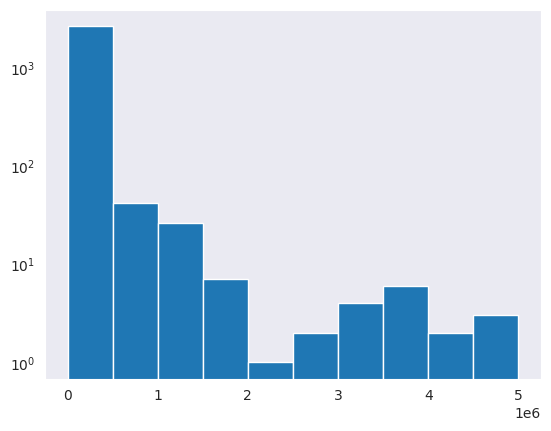

In [98]:
# select and plot data with no outliers
nooutliers_lowval = df[(df['Annual_Salary'] >= 5000) & (df['Annual_Salary'] <= 5000000)]
plt.hist(nooutliers_lowval.Annual_Salary);
#plt.xscale('log')
plt.yscale('log');

In [99]:
# create a new col with salary values as categories
# Define the bin ranges
bins = [0, 5000, 15000, 25000, 50000, 100000, 200000, float('inf')]

# Define the labels for each category
labels = ['Upto 5K', '5K-15K', '15K-30K', '30K-50K', '50K-100K', '100K-200K', 'Over 200K']

# Apply categorical encoding
ordinal_df.loc[:, 'year_salary'] = pd.cut(ordinal_df['Annual_Salary'], bins=bins, labels=labels, right=False)
ordinal_df.year_salary.value_counts()

50K-100K     950
100K-200K    943
Upto 5K      820
Over 200K    343
30K-50K      287
15K-30K      167
5K-15K        59
Name: year_salary, dtype: int64

In [100]:
# drop annual salary, pro_experience col after the category feature engineering
ordinal_df = dropping_columns(ordinal_df, 'Annual_Salary')


From the new target categries above, we realised there was a class imbalance on some of the salary ranges. Below we correct for this using SMOTE

In [101]:
# address the class imbalance in the new salaries col
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

X1, y1 = dropping_columns(ordinal_df, 'year_salary'), ordinal_df['year_salary']
imb = SMOTE(random_state=1)
X1res, y1res = imb.fit_resample(X1, y1)

# label encode y1res
le = LabelEncoder()
y1res_en = le.fit_transform(y1res)

In [102]:
X1res_train, X1res_test, y1res_train, y1res_test = train_test_split(X1res, y1res_en, test_size = 0.3, random_state = 1)

#### Logistic Regression **James/Sharon

In [103]:

# create a pipeline
pipe_3 = Pipeline([('ss', StandardScaler()),
                   ('logreg', LogisticRegression(fit_intercept=True, C=1e12, solver = 'liblinear', dual=False))])

# fit the train data

pipe_3.fit(X1res_train, y1res_train)

# predict on test data

y_trainpred_3 = pipe_3.predict(X1res_train)
y_pred_3 = pipe_3.predict(X1res_test)

In [121]:
# function to print metrics
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average='weighted', zero_division=1)))
    print("Recall Score: {}".format(recall_score(labels, preds, average='weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average='weighted')))

    return None


print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_3)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_3)


training metrics
__________________________________
Precision Score: 0.5893542740483173
Recall Score: 0.5920515574650913
Accuracy Score: 0.5920515574650913
F1 Score: 0.5878825503083633

test metrics
___________________________________
Precision Score: 0.5746175718693747
Recall Score: 0.5754385964912281
Accuracy Score: 0.5754385964912281
F1 Score: 0.5711352903447148


#### K-Nearest Neighbors **Rosemary**

In [105]:
# create a pipeline

pipe_4 = Pipeline([('ss', StandardScaler()),
                   ('neighbors', KNeighborsClassifier())])

# fit the training data

pipe_4.fit(X1res_train, y1res_train)

# predict on test data

y_pred_4 = pipe_4.predict(X1res_test)
y_trainpred_4 = pipe_4.predict(X1res_train)

print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_4)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_4)


training metrics
__________________________________
Precision Score: 0.7692726351952129
Recall Score: 0.7662728249194415
Accuracy Score: 0.7662728249194415
F1 Score: 0.7636246677147848

test metrics
___________________________________
Precision Score: 0.6499115941759398
Recall Score: 0.6541353383458647
Accuracy Score: 0.6541353383458647
F1 Score: 0.6472229761294348


#### Support Vector Classifier

In [106]:
# create a pipeline

#    pipe_5 = Pipeline([('ss', StandardScaler()),
#                      ('svc', SVC(kernel='poly'))])

    # fit the training data

 #   pipe_5.fit(X1res_train, y1res_train)

    # predict on test data

  #  y_pred_5 = pipe_5.predict(X1res_test)
   # y_trainpred_5 = pipe_5.predict(X1res_train)

    #print('training metrics')
    #print('__________________________________')
    #print_metrics(y1res_train, y_trainpred_5)
    #print('\ntest metrics')
    #print('___________________________________')
    #print_metrics(y1res_test, y_pred_5)


#### Decision Trees Classiffier **Samuel**

In [107]:
# create a pipeline
from sklearn.tree import DecisionTreeClassifier

pipe_6 = Pipeline([('ss', StandardScaler()),
                   ('tree', DecisionTreeClassifier())])

# fit the training data

pipe_6.fit(X1res_train, y1res_train)

# predict on test data

y_pred_6 = pipe_6.predict(X1res_test)
y_trainpred_6 = pipe_6.predict(X1res_train)

print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_6)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_6)


training metrics
__________________________________
Precision Score: 0.9974404327364025
Recall Score: 0.9974221267454351
Accuracy Score: 0.9974221267454351
F1 Score: 0.9974246923672039

test metrics
___________________________________
Precision Score: 0.6828246107436146
Recall Score: 0.6892230576441103
Accuracy Score: 0.6892230576441103
F1 Score: 0.6852004679830123


#### Random Forest Classier **James**

In [108]:
from sklearn.ensemble import RandomForestClassifier

# create a pipeline
pipe_7 = Pipeline([('ss', StandardScaler()),
                   ('rand', RandomForestClassifier())])

# fit the training data

pipe_7.fit(X1res_train, y1res_train)

# predict on test data

y_pred_7 = pipe_7.predict(X1res_test)
y_trainpred_7 = pipe_7.predict(X1res_train)

print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_7)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_7)

training metrics
__________________________________
Precision Score: 0.9974318754533988
Recall Score: 0.9974221267454351
Accuracy Score: 0.9974221267454351
F1 Score: 0.9974229995523907

test metrics
___________________________________
Precision Score: 0.7840058473592236
Recall Score: 0.7824561403508772
Accuracy Score: 0.7824561403508772
F1 Score: 0.7819069611212899


#### XG Boost

In [109]:
import xgboost as xgb

# create a pipeline
pipe_9 = Pipeline([('ss', StandardScaler()),
                   ('xgb', xgb.XGBClassifier())])

# fit the training data

pipe_9.fit(X1res_train, y1res_train)

# predict on test data

y_pred_9 = pipe_9.predict(X1res_test)
y_trainpred_9 = pipe_9.predict(X1res_train)

print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_9)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_9)

training metrics
__________________________________
Precision Score: 0.9795757580316167
Recall Score: 0.9793770139634801
Accuracy Score: 0.9793770139634801
F1 Score: 0.9794165977924809

test metrics
___________________________________
Precision Score: 0.7740123930505212
Recall Score: 0.7724310776942356
Accuracy Score: 0.7724310776942356
F1 Score: 0.7728823547726232


XG boost holds the most promise as it has the least gap betweeen training and test metrics, thus less prone to overfitting. It is thus the best candidate for hyperparameter tuning. Below we tune some hyperparameters and rerun the model

In [134]:
# identify XG boost hyperparameters
# for tuning

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

# Define the scoring metric
scorer = make_scorer(f1_score, average='micro')

xgb_params = [{
    "xgb__max_depth": [3, 4, 5, 7],
    "xgb__learning_rate": [0.1, 0.01, 0.05],
    "xgb__gamma": [0, 0.25, 1, 100],
    "xgb__reg_lambda": [0, 1, 10],
    "xgb__subsample": [0.8],
    "xgb__colsample_bytree": [0.5],
}]

# Creating a GridSearchCV with xgb_model as the estimator
gsv_xgb= GridSearchCV(estimator=pipe_9,
                       param_grid=xgb_params,
                       cv=5,
                       scoring='accuracy',
                       verbose=1)

# Fitting the model
gsv_xgb.fit(X1res_train, y1res_train)

# Get pest parametors
print('best params: ', gsv_xgb.best_params_)
print('best estimator: ', gsv_xgb.best_estimator_, '\n')

# predict on test data

#y_pred_9 = gsv_xgb.best_estimator_.predict(X1res_test)
#y_trainpred_9 = gsv_xgb.best_estimator_(X1res_train)

#print('training metrics')
#print('__________________________________')
#print_metrics(y1res_train, y_trainpred_9)
#print('\ntest metrics')
#print('___________________________________')
#print_metrics(y1res_test, y_pred_9)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
best params:  {'xgb__colsample_bytree': 0.5, 'xgb__gamma': 0.25, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__reg_lambda': 0, 'xgb__subsample': 0.8}
best estimator:  Pipeline(steps=[('ss', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.5, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0.25, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
            

In [145]:
# create a pipeline
pipe_10 = Pipeline([('ss', StandardScaler()), ('xgb', xgb.XGBClassifier(
    colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=7,
    reg_lambda=20, subsample=0.8))])

# fit the training data

pipe_10.fit(X1res_train, y1res_train)

# predict on test data

y_pred_10 = pipe_10.predict(X1res_test)
y_trainpred_10 = pipe_10.predict(X1res_train)

print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_10)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_10)

training metrics
__________________________________
Precision Score: 0.823493946394969
Recall Score: 0.8210526315789474
Accuracy Score: 0.8210526315789474
F1 Score: 0.8216096882199686

test metrics
___________________________________
Precision Score: 0.7207760147672555
Recall Score: 0.7192982456140351
Accuracy Score: 0.7192982456140351
F1 Score: 0.7193356269366626
